### LIBRARIES

In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from scipy.stats import normaltest

# Data Splitting
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

# Preprocessing
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder, OrdinalEncoder
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OrdinalEncoder

# ML algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
import lightgbm as lgb
import warnings

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# metrics
from sklearn.metrics import recall_score, classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import recall_score, make_scorer
from sklearn.metrics import make_scorer, recall_score

# **Bank Marketing Campaign**

## **1. Business Understanding**

(Supervised Learning-Classification)

- **Context :**  

    Produk keuangan kini semakin beragam, investasi depostito menjadi salah satu produk keuangan yang paling dikenal masyarakat. Mekanismenya adalah pelanggan menyetorkan sejumlah uang ke bank atau lembaga keuangan dan hanya dapat menariknya setelah periode tertentu, dengan imbalan bunga tetap sesuai jumlah deposito. Bagi bank, keuntungan nasabah yang berinvestasi pada deposito antara lain:

    - Sumber dana stabil: deposito menjadi aliran dana yang stabil bagi bank, sehingga memudahkan perencanaan keuangan dan manajemen [likuiditas](https://www.ojk.go.id/id/kanal/perbankan/regulasi/peraturan-ojk/Documents/Pages/POJK-Nomor-18.POJK.03.2016/SAL%20-%20POJK%20Manajemen%20Risiko%20.pdf).

    - Biaya dana rendah: suku bunga deposito lebih rendah dari pembiayaan lainnya, sehingga dapat memberikan biaya dana yang lebih efisien.

    - Pendapatan lebih tinggi: bank dapat memanfaatkan dana deposito untuk pinjaman atau investasi dengan keuntungan yang lebih tinggi, sehingga menghasilkan keuntungan dari selisih bunga.

    - [Diversifikasi](https://www.ocbc.id/id/article/2021/07/12/diversifikasi-adalah) produk: menawarkan deposito yang menarik bagi berbagai jenis nasabah, serta memperluas produk yang tersedia dapat meningkatkan data tarik dari bank.

    - Maintain nasabah: deposito dengan suku bunga kompertitif dapat menarik nasabah baru dan meningkatkan loyalitas nasabah, sehingga mengurangi kemungkin nasabah berpindah bank. Ketika nasabah tidak berpindah ke bank lain, kestabilan pemasukan untuk bank semakin baik.

    Berdasarkan hal yang telah disebutkan diatas, investasi deposito menjadi program yang penting untuk bank. Namun, bank harus terus bersaing untuk mempertahankan dan menarik nasabah. Salah satu strategi efektif untuk mendapatkan nasabah baru adalah melalui marketing campaign melalui telemarketing.

- **Problem Statement :**

    Target dalam konteks ini adalah `deposit`, yang mencerminkan apakah nasabah berinvestasi atau tidak terhadap deposito yang ditawarkan setelah menerima campaign dari telemarketing. Untuk meningkatkan efisiensi dan efektivitas campaign tersebut, bank perlu memprediksi dan mengidentifikasi nasabah yang memiliki kemungkinan tinggi untuk berinvestasi pada deposito ketika ditawarkan campaign via telemarketing. 

- **Goals :**

    Dengan memanfaatkan profil nasabah dan data hasil campaign sebelumnya, bank bertujuan untuk memanfaatkan teknik machine learning untuk menilai probabilitas setiap nasabah yang berpotensi investasi dengan meningkatkan akurasi prediksi. Selain itu, bank ingin mengetahui profil atau faktor apa saja dari nasabah yang memiliki potensi investasi deposito, sehingga dapat membuat campaign yang lebih tepat sasaran.

- **Analytic Approach :**

    Akan dilakukan analisi data untuk menemukan pola yang membedakan nasabah potensial dan tidak, kemudian akan dibangun model klasifikasi yang dapat membantu bank untuk memprediksi probabilitas seorang nasabah yang berpotensial atau tidak.

- **Metric Evaluation :**

    Maka target yang ditetapkan adalah sebagai berikut: 

    - 0: Nasabah tidak potensial melakukan investasi deposito

    - 1: Nasabah potensial melakukan investasi deposito.

    Dari sisi kepentingan false positives dan false negatives dalam kontesk telemarketing untuk investasi deposito, maka didapatkan analisa sebagai berikut:

    1. Definisi Kerugian

        - False Positives: Calon nasabah tidak potensial investasi deposito tapi diprediksi sebagai calon potensial. Kerugian utamanya adalah biaya telemarketing yang dikeluarkan untuk calon nasabah yang tidak potensial.
    
        - False Negatives : Calon yang potensial berinvestasi namuan diprediksi sebagai calon yang tidak potensial. Kerugian utamanya adalah kehilangan potensi pemasukan dari calon nasabah yang sebenarnya potensial.

    2. Analisa Dampak Finansial:

        - False Positives, biaya Telemarketing, yang akan disimulasikan sebagai berikut:

            - [Aplikasi telemarketing](https://qontak.com/harga/) premium untuk 1 bulan adalah Rp.3.499.999 untuk 10.000 nomor aktif.

            - Seorang telemarketer dalam [sehari bisa melakukan panggilan hingga 130 orang](https://www.vice.com/id/article/10-pertanyaan-bikin-penasaran-buat-telemarketer-yang-gigih-menelepon-kita-siang-malam/), namun untuk mempermudah perhitungan anggap saja sehari 100 orang yang ditelpon, maka untuk memaksimalkan kuota aplikasi telemaketing (10.000 nomor aktif), maka dibutuhkan 100 orang telemarketer.

            - Jika [gaji seorang telemarketer](https://www.kitalulus.com/blog/seputar-kerja/tugas-dan-karir-telemarketing/) adalah Rp.3.500.000, maka dalam sebulan dibutuhkan dana Rp.350.000.000 untuk gaji telemarketer.

            - **Total pengeluaran biaya telemaketing** (aplikasi+gaji) adalah  Rp.353.499.000 untuk 10.000 nomor aktif nasabah atau **Rp.35.349,9/bulan untuk satu nasabah**.

        - False Negatives, kehilangan pemasukan dari calon nasabah yang sebenarnya potensial, yang akan disimulasikan sebagai berikut:

            - Mengacu pada [simulasi deposito](https://www.bca.co.id/id/Individu/produk/simpanan/Deposito-Berjangka), maka deposito minimal sesorang adalah Rp.8.000.000, yang jika disimpan selama satu tahun, maka nasabah akan mendapatkan Rp.8.128.000.

            - Dalam bisnis, bank akan memutar dana tersebut untuk mendapatkan keuntungan dari dana tersebut. Misal bank akan meminjamkan uang tersebut kepada nasabah peminjam, maka mengacu pada [simulasi pinjaman personal](https://www.bca.co.id/id/Individu/produk/pinjaman/Pinjaman-Personal), yang apabila akan dikembalikan dalam satu tahun, maka nasabah peminjam harus mengembalikan Rp.8.960.004.
            
            - Berdasarkan simulasi tersebut, maka diperkirakan **keuntungan minimum** bank dari **seorang nasabah yang berinvestasi deposito** adalah RP.832.004/tahun atau **RP.69.333/bulan untuk satu nasabah**.

    3. Efek Jangka Panjang:

        - False POsitives: akan terjadi pemborosan berulang dari telemarketing yang tidak efektif.

        - False Negatives: kehilangan peluang jangka panjang yang dapat mempengaruhi pertumbuhan dan reputasi perusahaan.

    4. Prioritas:

        - False Negatives: mengacu pada keuntungan yang didapatkan oleh bank (yang telah dipaparkan sebelumnya), maka false negatives cenderung lebih keritikal karena artinya bank akan kehilangan potensi pemasukan yang signifikan

        - False POsitives: pentingnya mengurangi atau menghindari pemborosan biaya, tapi dampaknya umumnya lebih rendah daibandingkan kerugian dari kehilangan calon potensial.

    5. Perbandingan Keuntungan dan Biaya berdasarkan simulasi pada point 2:

        - Keuntungan mendapatkan investasi deposito : RP.69.333/bulan untuk satu nasabah
        
        - Kerugian biaya telemarketing : Rp.35.349,9/bulan untuk satu nasabah

    6. Strategi:

        - Meningkatkan akurasi prediksi untuk mengurangi false positives dan false negatives.

        - Analisis biaya dan manfaat dengan cara evealuasi strategi telemarketig secara berkala.

        - Memberikan masukan kepada bank untuk meningkatkan data agar lebih akurat dan segmentasi yang tepat untuk meminimalkan kedua jenis kesalahan tersebut.

    7. Matrix Evaluasi yang pertimbangkan:

        - Recall : mengukur seberapa baik model dalam menangkap calon nasabah potensial untuk investasi deposito, dengan fokus pada mengurangi false negatives. Meskipun efektif untuk menangkap banyak calon potensial, namun matrix ini memiliki resiko terhadap false positives, yang dapat meningkatkan biaya telemarketing tanpa hasil yang diinginkan.

        - F1 Score : menyeimbangkan antara identifikasi calon yang benar-benat potensial dan menghindari melakukan telemarketing yang tidak efektif. Kelebihannya adalah kemampuan untuk menggabungkan keuntungan dari Recall dan Precision, sehingga mengurangi kedua jenis kesalahan. Namun matrix ini tidak dapat sepenuhnya menangani trade-off antara biaya yang terkait dengan false positives dan kehilangan potensi dari false negative.

    8. Kesimpulan:

        - Akan diprioritaskan untuk mengoptimalkan model dalam mendapatkan calon nasabah yang benar-benar potensial sekaligus meminimalkan biaya marketing, sehingga matrix yang akan digunakan adalah F1-Score.

- **Feature dan Hipotesa**

    - Customer profile:

        -	`age` : menunjukkan usia nasabah. Memahami usia nasabah dapat membantu penyesuaian pesan campaign deposito dengan preferensi nasabah. Misalnya, nasabah yang usianya lebih muda mungkin tertarik pada produk yang memiliki resiko dan keuntungan yang lebih tinggi, sementara nasabah yang lebih tua mungkin lebih memilih investasi yang stabil dan resiko rendah seperti deposito.

        -	`job` : menunjukkan jenis pekerjaan nasabah. Hal ini dapat memberikan gambaran tentang stabilitas financial dan kebiasaan menabung nasabah. Profesi dengan pekerjaan yang stabil mungkin cenderung berinvestai, namun akan dilakukan analisa lagi berdasarkan dataset.

        -	`balance`: menunjukkan saldo nasabah. Saldo yang lebih tinggi kenungkinan cenderung memiliki kapasitas finansial dan potensi untuk investasi.
        
        -	`housing`: menunjukkan kepemilikan rumah. Kepemilikan rumah biasanya juga mempengaruhi kebiasaan menabung dan potensi investasi nasabah.

        -	`loan`: informasi status nasabah pada pinjaman. Informasi ini dapat menunjukkan kewajiban potensial dan kemampuan nasabah untuk berinvestasi dalam deposito.

    - Marketing data:

        -	`contact` : Feature ini menunjukkan jenis komunikasi yang digunakan untuk menghubungi nasabah untuk mempengaruhi efektivitas campaign

        -	`month` : Feature ini merupakan bulan terakhir nasabah di hubungi, yang dapapat membantu identifikasi waktu optimal untuk melakukan kontak.

        -	`campaign` : Feature ini akan menunjukkan seberapa sering bank menghubungi klien. 

        -	`pdays` : Feature ini menunjukkan berapa hari telah berlalu sejak nasabah terakhir dihubungi dalam campaign sebelumnya. Interval yang lebih pendek mungkin menunjukkan ketertarikan, sementara interval yang lebih panjang mungkin menunjukkan waktu yang tepat untuk kembali terlibat.
        
        -	`poutcome` : Feature ini merupakan hasil dari campaign sebelumnya, yang dapat memberikan wawasan startegi yang berhasil atau tidak berhasil. Menganalisa feature ini dapat membantu campaign mendatang untuk meningkatkan efektivitas
                                                                        
        -	`deposit` : Merupakan status deposito nasabah, yang menjadi indikator utama keberhasilan campaign. 

## **2. Data Understanding**

### **Collection**

In [2]:
data=pd.read_csv('data_bank_marketing_campaign.csv')
print(f'Jumlah baris dan kolom {data.shape}')


Jumlah baris dan kolom (7813, 11)


In [3]:
#lima data awal
data.head(5)

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no


In [4]:
# lima data terakhir
data.tail(5)

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
7808,62,housemaid,2,no,no,cellular,nov,1,-1,unknown,yes
7809,48,housemaid,5473,no,no,cellular,feb,2,184,success,yes
7810,36,unknown,179,no,no,cellular,aug,8,-1,unknown,no
7811,31,admin.,54,yes,no,cellular,nov,1,-1,unknown,no
7812,60,retired,1588,no,no,cellular,oct,1,-1,unknown,yes


Interpretasi:

- Terdapat 7813 data dengan 11 kolom 

### **Initial Assesment**

In [5]:
# Cek tipe data, nilai null, dan nilai unik dari setiap kolom
pd.DataFrame({
    'feature': data.columns.values,
    'data_type': data.dtypes.values,
    'null': data.isna().mean().values * 100,
    'negative': [True if data[col].dtype == int and (data[col] < 0).any() else False for col in data.columns],
    'n_unique': data.nunique().values,
    'sample_unique': [data[col].unique() for col in data.columns]
})

,feature,data_type,null,negative,n_unique,sample_unique
0,age,int64,0.0,False,75,"[55, 39, 51, 38, 36, 41, 37, 35, 57, 23, 33, 3..."
1,job,object,0.0,False,12,"[admin., self-employed, services, housemaid, t..."
2,balance,int64,0.0,False,3153,"[1662, -3058, 3025, -87, 205, -76, 4803, 911, ..."
3,housing,object,0.0,False,2,"[no, yes]"
4,loan,object,0.0,False,2,"[no, yes]"
5,contact,object,0.0,False,3,"[cellular, telephone, unknown]"
6,month,object,0.0,False,12,"[jun, apr, may, nov, jan, sep, feb, mar, aug, ..."
7,campaign,int64,0.0,False,32,"[2, 3, 1, 4, 5, 6, 7, 30, 8, 9, 11, 14, 10, 28..."
8,pdays,int64,0.0,False,422,"[-1, 352, 21, 91, 186, 263, 96, 355, 294, 412,..."
9,poutcome,object,0.0,False,4,"[unknown, other, failure, success]"


Hal-hal yang perlu diperhatikan:
- `balance` : periksa kolom `balance` dengan value <0. nilai negatif mungkin menunjukkan nasabah memiliki hutang. 

- `contact` : periksa kolom `contact` dengan value 'unknown'. 

- `pdays` : periksa kolom `pdays` dengan value <0. Value -1 mungkin mengindikasikan bahwa nasabah tidak pernah dihubungi sebelumnya. 

- `poutcome` : periksa kolom poutcome dengan value 'unknown'. 

- periksa `pdays` dengan value <0 apakah ada keterhubungan dengan `poutcome` dengan value 'unknown'?

- `deposit` : variabel target, yang menunjukkan apakah nasabah melakukan deposito atau tidak. periksa proporsinya, untuk mengetahui balance atau tidak

### **Descriptive Statistics**

In [6]:
display(data.describe(), data.describe(include='object'))

,age,balance,campaign,pdays
count,7813.000000,7813.000000,7813.000000,7813.000000
mean,41.257264,1512.448611,2.519775,51.408550
std,11.919710,3089.291831,2.727001,108.072739
min,18.000000,-6847.000000,1.000000,-1.000000
25%,32.000000,127.000000,1.000000,-1.000000
50%,39.000000,549.000000,2.000000,-1.000000
75%,49.000000,1684.000000,3.000000,40.000000
max,95.000000,66653.000000,63.000000,854.000000


,job,housing,loan,contact,month,poutcome,deposit
count,7813,7813,7813,7813,7813,7813,7813
unique,12,2,2,3,12,4,2
top,management,no,no,cellular,may,unknown,no
freq,1792,4140,6789,5628,1976,5819,4081


Interpretasi:

- Numerical

    - `age`: memiliki value dengan variasi yang besar antara 18-95 tahun. Sehingga perlu dipertimbangkan untuk melakukan pengelompokkan dalam data sehingga memudahkan model dalam menangani data yang mungkin tidak linear atau menangani outlier, lalu lakukan encoding.
    
    - `balance`: feature ini memiliki standar deviasi yang tinggi, sama seperti `age`, perlu dipertimbangkan untuk mengelompokkan data lalu encoding data.

    - `pdays`: feature ini memiliki nilai negatif, yang mungkin bisa menunjukkan missing value atau mengindindikasikan belum pernah di hubungi, sehingga perlu dipertimbangkan untuk handling missing value kolom tersebut atau membiarkannya sebagai sebuah kategori.

- Categorical:

    - `job`: ada 12 unique value, pertimbangkan untuk melakukan pengelompokkan data lalu encoding data.
    
    - `housing`: ubah sebagai biner yes=1, no=0 untuk mempermudah pemodelan.
    - `loan`: ubah sebagai biner yes=1, no=0 untuk mempermudah pemodelan.
    - `contact`: terdapat tiga unique value, maka pertimbangkan menggunakan one-hot encoding untuk feature ini.
    - `month`: ada 12 unique value, pertimbangkan untuk melakukan segmentasi/berdasarkan feature vs target lalu encoding.
    - `poutcome`: terdapat value 'unknown' yang harus dihandling, baik dengan handling missing value atau membiarkan sebagai kategori tersendiri. Pertimbangkan juga untuk tidak menggunakan feature ini karena dominasi valuenya 'unknown'.
    - `deposit`:  ubah sebagai biner yes=1, no=0 untuk mempermudah pemodelan.


## **3. Exploratory Data Analysis (EDA)**

### **Duplicates**

In [7]:
print(f"Jumlah duplikasi data: {data[data.duplicated()].shape}")
print(f'Persentase sebesar {len(data[data.duplicated()])/len(data)*100:.2f}%')

Jumlah duplikasi data: (8, 11)
Persentase sebesar 0.10%


Interpretasi:

- Didapatkan data duplikat sebesar 0.1% sehingga akan dilakukan handling duplikat dengan drop duplikat.

**Penanganan Data Duplikat**

In [8]:
# handling duplikat
data=data.drop_duplicates()

### **Missing Values**

In [9]:
# periksa value null pada dataset
pd.DataFrame({'null': [data[col].isna().sum() for col in data.columns]}, index=data.columns.values)

,null
age,0
job,0
balance,0
housing,0
loan,0
contact,0
month,0
campaign,0
pdays,0
poutcome,0


In [10]:
# periksa value unknown pada dataset
pd.DataFrame((((data=='unknown').sum()/data.notna().sum())*100).round(2), columns=['% Unknown'])

,% Unknown
age,0.00
job,0.69
balance,0.00
housing,0.00
loan,0.00
contact,20.96
month,0.00
campaign,0.00
pdays,0.00
poutcome,74.45


In [11]:
# periksa value negatif pada dataset
pd.DataFrame((((data.apply(pd.to_numeric, errors='coerce')<0).sum()/data.notna().sum())*100).round(2),columns=['Negative Count'])

,Negative Count
age,0.00
job,0.00
balance,6.14
housing,0.00
loan,0.00
contact,0.00
month,0.00
campaign,0.00
pdays,74.43
poutcome,0.00


**Analisa Feature-feature yang Terdapat 'unknown' dan negative**

In [12]:
# periksa proporsi pdays negatif dalam data
(data['pdays'].value_counts(normalize=True)*100).round(2).get(-1,0)

74.43

In [13]:
# periksa keterhubungan antara pdays negatif dengan poutcome
filter=data[data['pdays'] <0]
(filter['poutcome'].value_counts(normalize=True)*100).round(2)

poutcome
unknown    100.0
Name: proportion, dtype: float64

- Keterhubungan antara `pdays` negatif dengan `poutcome`: didapatkan bahwa untuk setiap baris dimana `pdays` bernilai negatif, 100% dari nilai `poutcome` adalah 'unknown'. Hal ini menunjukkan bahwa ketika `pdays` negatif (yang dicurigai sebagai tanda nasabah belum pernah di hubungi sebelumnya), informasi tentang `poutcome` tidak tersedia, yang artinya: jika nasabah belum pernah di hubungi, maka menjadi masuk akal jika blm ada hasil terhadap penawaran investasi deposito.

In [14]:
# periksa keterhubungan antara contact unknown dengan pdays, untuk mengetahui apakah contac
filter3=data[data['contact'] == 'unknown']
(filter3['pdays'].value_counts(normalize=True)*100).round(2).head(1)

pdays
-1    99.02
Name: proportion, dtype: float64

- Keterhubungan antara `contact` unknown dengan `pdays`: didapatkan bahwa untuk setiap baris dengan `contact` unknown, 99.02% data memiliki `pdays` yang bernilai negatif. Hal ini memperkuat bahwa `pdays` negatif memang diartikan sebagai nasabah yang belum pernah dihubungi sebelumnya, sehingga tidak tersedia data `contact` nasabah.

In [15]:
# periksa keterhubungan antara pdays negatif dengan contact	
filter=data[data['pdays'] == -1]
(filter['contact'].value_counts(normalize=True)*100).round(2)

contact
cellular     65.11
unknown      27.89
telephone     7.01
Name: proportion, dtype: float64

- Keterhubungan antara `pdays` negatif dengan `contact` : didapatkan bahwa untuk setiap baris dengan `pdays` negatif, 27.89% tidak memiliki informasi yang jelas sebagai `unknown`, namun didominasi dengan `contact` selullar dan adanya data `contact` telephone, padahal yang telah kita ketahui `pdays` negatif mengindikasikan belum pernah dihubungi sebelumnya. Hal ini dapat mengindikasikan bahwa adanya ketidakakuratan data pada `pdays` ataupun `contact`, sehingga bank harus menegaskan kepada telemarketer untuk mencatat dengan benar.

In [16]:
# periksa proporsi balance 0 dan  negatif dalam data
((data[data['balance']<=0].shape[0])/(data.shape[0]))*100

13.042921204356182

In [17]:
# periksa keterhubungan antara balance 0 dan negatif dengan hasil pada deposit
filter1=data[data['balance'] <= 0]
(filter1['deposit'].value_counts(normalize=True)*100).round(2)

deposit
no     66.01
yes    33.99
Name: proportion, dtype: float64

- Keterhubungan antara `balance` negatif dengan hasil deposit: nasabah dengan saldo <=0, 66.01% tidak berivestasi pada deposito, meskipun terdapat proporsi yang signifikan yang tetap berinvestasi pada deposito, yang artinya: terdapat feature lain yang mungkin dapat mempengaruhi keputusan nasabah berdeposito.

In [18]:
# periksa keterhubungan antara balance 0 dan negatif dengan hasil pada loan
filter2=data[data['balance'] <= 0]
(filter2['loan'].value_counts(normalize=True)*100).round(2)

loan
no     77.31
yes    22.69
Name: proportion, dtype: float64

- Keterhubungan antara `balance` <=0 dengan `loan`: didapatkan bahwa nasabah dengan `balance` <=0 lebih umum terkait dengan ketidakmampuan untuk mendapatkan pinjaman, walaupun ada juga nasabah yang memiliki hutang walaupun `balance` <=0. 



Interpretasi:

- data null : tidak ada missing value (null) dalam dataset

- data 'unknown' : kolom `job`, `contact`, dan `poutcome` mengandung nilai 'unkown' yang signifikan.

- data negative : kolom `balance` dan `pdays` mengandung nilai negatif. Pada `balance` terdapat nilai negatif, namun sepertinya bukan missing value melainkan bisa menjadi suatu informasi, namun pada `pdays`, nilai negatifnya bisa jadi indikasi missing value. 

- Berdasarkan analisa pada `pdays` dan `poutcome` didapatkan bahwa untuk `pdays` yang negatif maka tidak tersedia data pada `poutcome`. Dengan kata lain, jika nasabah belum pernah dihubungi, maka tidak ada hasil yang tercatat untuk penawaran investasi deposito.

- Berdasarkan analisa pada `pdays` dan `contact` didapatkan bahwa terdapat kemungkinan permasalahan ketersediaan dan konsistensi data terkait `contact`. Nasabah dengan `pdays` negatif yang berarti belum pernah dihubungi sebelumnya, tapi tersedia informasi `contact` nya. Padahal seharusnya jika nasabah belum pernah dihuubngi, maka `contact` akan berisi 'unknown'. Hal ini dapat mencerminkan ketidakkonsistenan data, yang mungkin dapat mempengaruhi analisa dan keputusan dari modeling.

- Berdasarkan analisa pada `balance` didapatkan bahwa nasabah dengan `balance` <=0 menunjukkan kecendrungan untuk menolak tawaran deposit, yang mungkin mencerminkan ketidakmampuan nasabah terhadap tambahan beban financial dalam kondisi keuangan yang sudah buruk. Di sisi lain, meskipun `balance` <=0 dapat mengindikasikan kesulitan keuangan, dari data dapat diindikasikan bahwa nasabah juga sulit untuk mendapatkan pinjaman (dilihat dari `loan` no). Sehingga Bank perlu mempertimbangkan kondisi keuangan pelanggan dalam strategi pemasaran. Untuk nasabah dengan `balance` <=0, mungkin dapat dipertimbangkan untuk menarwarkan produk yang lebih sesuai dengan kemampuan mereka, atau memperhatikan feature lainnya sehingga dapat mempertimbangkan mereka sebagai nasabah yang potensial.

- Alasan mengapa kolom `poutcome` dan `pdays` missing value tinggi **dipertimbangkan untuk tidak dijadikan feature**:

    1. Kualitas data terbatas: dengan hampir 75% missing value, kolom `pdays` dan `poutcome` menyumbangkan informasi yang sangat terbatas untuk analisis. Hal tersebut dapat mengurangi kualitas data dan membuat informasi dalam kolom tersebut kurang informatif. 

    2. Meningkatkan kompleksitas model: jika kolom `pdays` dan `poutcome` akan di imputasi, maka bisa jadi tidak memberikan hasil yang akurat serta kompleksitas model makin tinggi dan belum tentu memberikan model yang baik. Hal ini juga dapat menyebabkan overvitting, dimana model akan berusaha untuk belajar dari data yang tidak representatif.

    3. Efisiensi analisis: mengabaikan kolom `pdays` dan `poutcome` dapat menyederhanakan dimensi yang mungkin dapat membuat analisis lebih efisien dan lebih mudah dikelola. Seliain itu, kita bisa lebih fokus menganalisa pada fitur yang lebih informatif dan relevan.

    4. Jika dilihat dari keterhubungan missingvalue, maka `pdays` dengan value <0 hanya berelasi pada `poutcome` dengan value 'unknown', hal tersebut menunjukkan adanya keterhubungan. Sehingga jika salah satu kolom tersebut tidak diikutsertakan, maka satu kolom lainnya juga.

    5. Namun, akan tetap dilakukan explorasi data untuk lebih mendapatkan informasi mengenai kedua kolom tersebut.


- Alasan mengapa `contact` dengan missing value 20.96% tetap dijadikan feature:

    1. Berdasarkan [jenis telemarketing](https://mitracomm.com/telemarketing-adalah/), telemarketing memang melakukan contact via 'cellular' ataupun 'phone', namun kolom ini saya rasa memiliki relevansi yang penting untuk menganalisa hasil campaign.


### **Numerical Features**

#### **Data Distribution**

In [19]:
numerical = [var for var in data.columns if data[var].dtypes not in ['object']]

In [20]:
dist = []

for i in range(len(numerical)):
    feature_name = numerical[i]
    stat, p_value = normaltest(data[feature_name].dropna())
    
    if p_value > 0.05:
        distribution = "Normally Distributed"
    else:
        distribution = "Not Normally Distributed"
    
    dist.append([feature_name, stat, p_value, distribution])

dist_df = pd.DataFrame(dist, columns=['Feature', "D'Agostino-Pearson Statistic", 'P-value', 'Distributed'])
dist_df

,Feature,D'Agostino-Pearson Statistic,P-value,Distributed
0,age,819.059254,1.391691e-178,Not Normally Distributed
1,balance,9799.383492,0.000000e+00,Not Normally Distributed
2,campaign,8669.137504,0.000000e+00,Not Normally Distributed
3,pdays,3877.270153,0.000000e+00,Not Normally Distributed


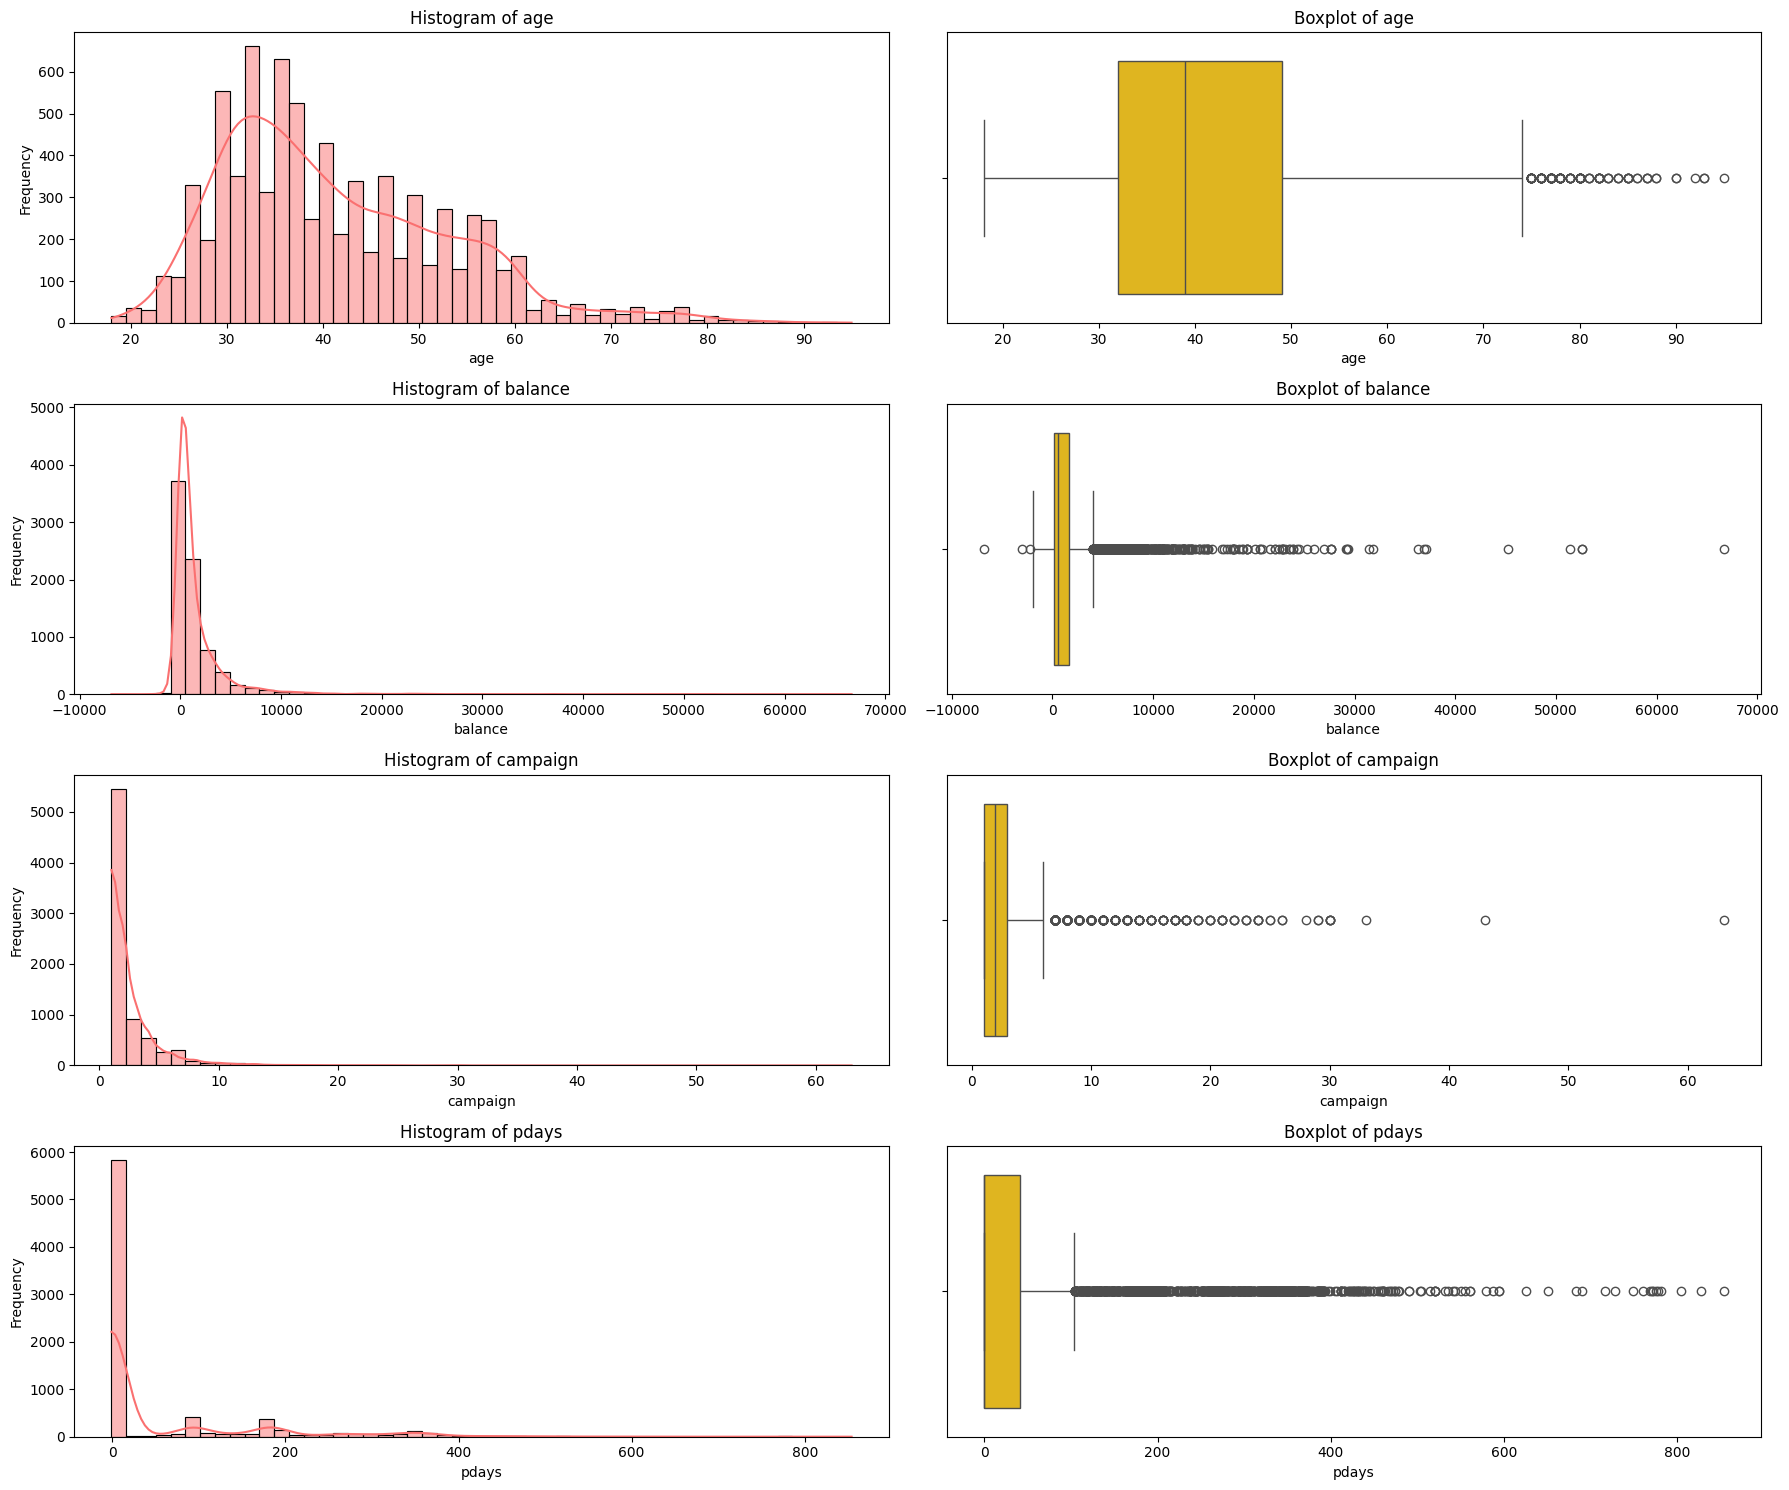

In [21]:
# visualisasi data distribution
plt.figure(figsize=(18, 15))

for index, col in enumerate(numerical):
    # Histogram
    plt.subplot(len(numerical), 2, index * 2 + 1)
    sns.histplot(data[col], kde=True, color='#FA7070', bins=50)
    plt.title(f'Histogram of {col}', size=12)
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(len(numerical), 2, index * 2 + 2)
    sns.boxplot(x=data[col], color='#FFC700')
    plt.title(f'Boxplot of {col}', size=12)
    plt.xlabel(col)

plt.tight_layout()
plt.show()

Interpretasi:

- Feature `age`, `balance`, `campaign`, dan `pdays` berdasarkan hasil uji D'Agostino-Pearson tidak terdistribusi normal. P-value yang sangat kecil dapat mengindikasikan adanya skewness atau outliers yang signifikan pada masing-masing kolom yang dapat dilihat pada visualisasi diatas.

- Berdasarkan grafik yang ada, didapatkan bahwa:
>
| Feature   | Skewness        | Analisa |
|-----------|-----------------|---------|
| `age`     | Positive Skew   | Sebagian besar nasabah berusia muda dan terdapat nasabah berusia dengan nilai ekstrim yang tinggi |
| `balance` | Positive Skew   | Banyak saldo yang rendah dan beberapa nilai saldo sangat tinggi, yang menunjukkan distribusinya tidak merata |
| `campaign`| Positive Skew   | Mayoritas nasabah mendapatkan campaign yang sedikit, namun terdapat beberapa nasabah dengan jumlah campaign yang tinggi |
| `pdays`   | Positive Skew   | Banyak nilai yang rendah, yang menunjukkan bahwa nasabah mungkin belum pernah dihubungi, namun terdapat nasabah yang yang baru dihubungi |



#### **Correlation**

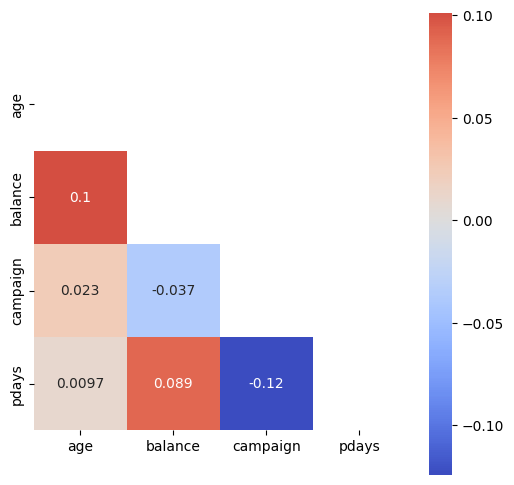

In [22]:
plt.figure(figsize=(6, 6))

matrix = np.triu(data.corr(method='spearman', numeric_only=True))

sns.heatmap(data=data.corr(method='spearman', numeric_only=True), annot=True, cmap='coolwarm', center=0, mask = matrix, square='True')
plt.show()

Interpretasi:

- Secara umum, korelasi antara kolom `age`, `balance`, `campaign`, dan `pdays` sangat lemah, dengan nilai-nilai mendekati nol dan sedikit negatif ataupun positif. Hal ini dapat menunjukkan bahwa tidak terdapat hubungan kuat antara variabel yang akan diuji.

- Model perlu memperhitungkan kemungkinan bahwa variabel-variabel ini tidak bekerja secara independen atau memiliki korelasi yang lebih kompleks yang tidak dapat tercermin hanya dari korelasi sederhana.

#### **Feature vs Target**

In [23]:
numerical

['age', 'balance', 'campaign', 'pdays']

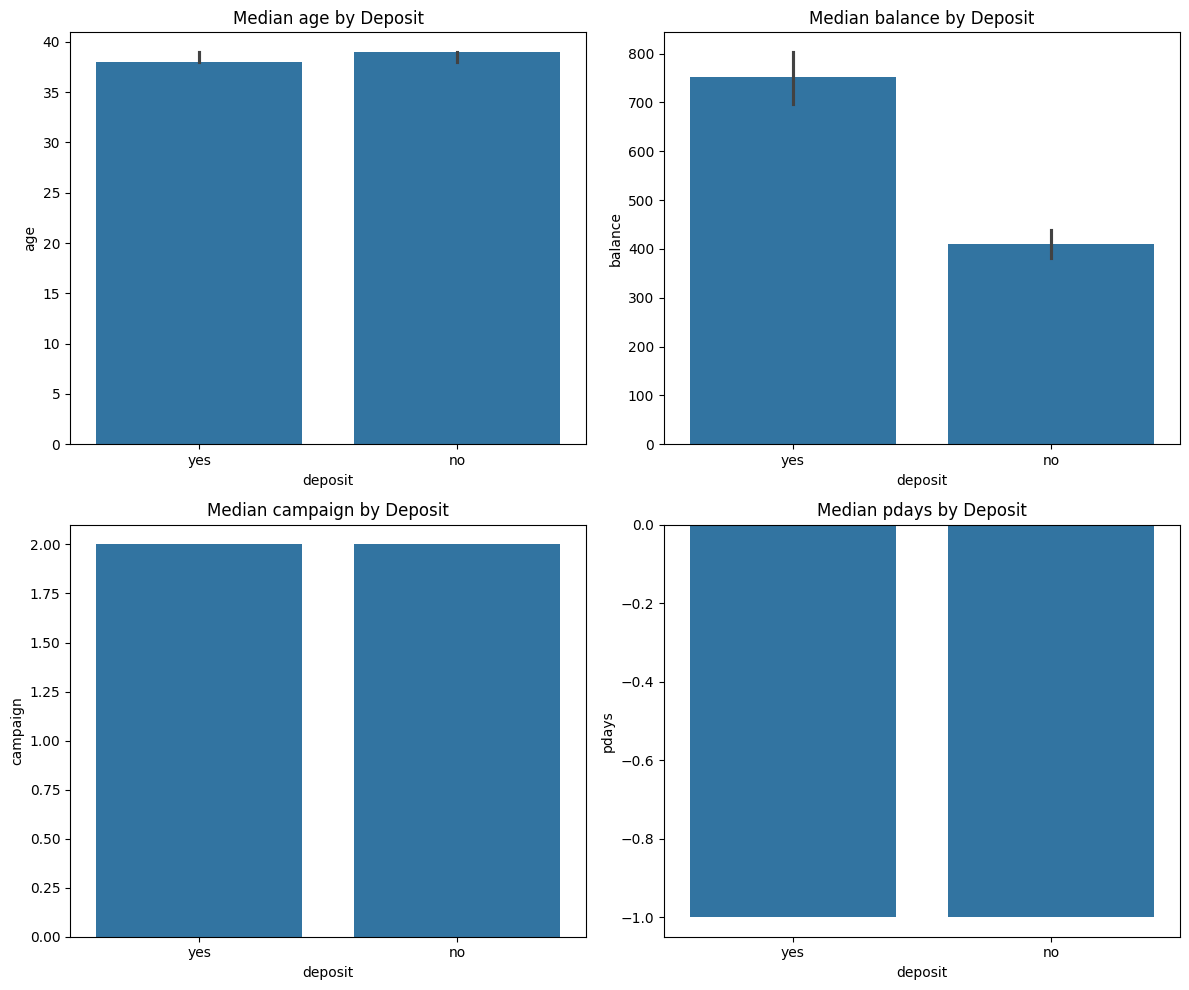

In [24]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for col, ax in zip(numerical, axes.flatten()):
    sns.barplot(data=data, y= col, x='deposit', estimator=np.median, ax= ax, )
    ax.set_title(f'Median {col} by Deposit') 

plt.tight_layout()
plt.show()

| Feature | Interpretasi |
|--------------------------------|----------------------------------------------------------------------|
| `age` | perbedaan median usia nasabah dengan `deposit` 'yes' dan 'no' sangat kecil, yang dapat menunjukkan bahwa usia tidak menjadi faktor penentu utama. Mengingat banyaknya nilai unik pada feature ini, maka akan dilakukan segmentasi `age` berdasarkan sumber yang ada |
| `balance` | nasabah dengan `deposit` 'yes' memiliki saldo yang lebih tinggi, yang dapat menunjuukan kemampuan finansial yang lebih besar untuk bisa berinvestasi dalam deposito |
| `campaign` | median jumlah campaign tidak menunjukkan perbedaan antara nasabah dengan `deposit` 'yes' ataupun 'no', yang dapat menunjukkan bahwa frekuensi kontak tidak mempengaruhi keputusan pada investasi deposito |
| `pdays` | median pdays menunjukkan nilai negatif yang sama pada `deposit` 'yes' ataupun 'no', yang mungkin menunjukkan bahwa `pdays` tidak dapat memerikan informasi tambahan mengenai keputusan pada investasi deposito |

##### **Segmentasi Feature `age`**

- Feature `age` memiliki 75 nilai unik dari 18-95 tahun, maka akan dilakukan segmentasi umur yang mewakili nilai pada feature ini, yang akan dituangkan pada feature `cat_age`.

- Berdasarkan [age categories](https://pubmed.ncbi.nlm.nih.gov/32025368/), didapatkan bahwa:

    | Range      | Categories    |
    |------------|---------------|
    | 18-25      | Young         |
    | 26-44      | Adults        |
    | 45-59      | Middle-Age    |
    | 60-above   | Old           |


In [25]:
age_cat=[]
for age in data['age']:
    if age <=25:
        cat='Young'
    elif age <=44:
        cat='Adults'
    elif age <=59:
        cat='Middle-Age'
    else:
        cat='Old'
    age_cat.append(cat)
data['cat_age']=age_cat
data.head()

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit,cat_age
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes,Middle-Age
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes,Adults
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes,Middle-Age
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no,Adults
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no,Adults


In [26]:
data['cat_age'].value_counts()

cat_age
Adults        4791
Middle-Age    2153
Old            554
Young          307
Name: count, dtype: int64

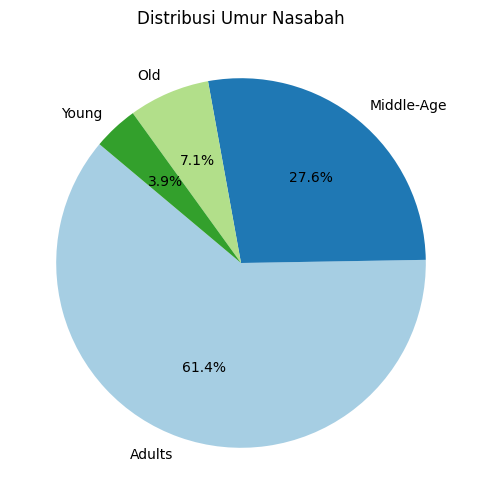

In [27]:
age_counts = data['cat_age'].value_counts()

# Buat pie chart
plt.figure(figsize=(8, 6))
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(age_counts))))
plt.title('Distribusi Umur Nasabah')
plt.show()

##### **Analisa Tambahan Feature `balance`**

In [28]:
data['balance'].min(), data['balance'].max() 

(-6847, 66653)

In [29]:
data['balance'].value_counts().sum()

7805

In [30]:
data[(data['balance']==0) & (data['deposit']==1)].value_counts().sum()

0

In [31]:
data[(data['balance']<0) & (data['deposit']==1)].value_counts().sum()

0

Interpretasi :

- Terdapat 346 (4.35%) data dengan `balance` dibawah atau sama dengan 0 dengan pekerjaan yang beragam, namun berinvestasi pada desposito. 

- Berdasarkan data, timbul kecurigaan pada  ['balance']<0 namun data['deposit']=1, hal ini biasanya cenderung tidak terjadi dan tidak masuk akal, sehingga akan dicoba filter data tanpa kategori tersebut dalam pemodelan dan akan dibandingkan hasilnya.

- Dalam perbankan dan investasi, sangat penting bagi bank untuk bijaksana pada nasabah yang memiliki `balance` negatif (hutang). Menerima nasabah dengan kondisi tersebut untuk berdeposito dapat menimbulkan resiko serius bagi bank, yang dapat berdampak negatif pada keuangan dan reputasi Bank. Potensi kerugian utama meliputi gangguan likuiditas akibat penarikan depostio dini oleh nasabah yang mengalami kesulitan finansial, serta biaya administrasi yang lebih tinggi untuk menangani nasabah-nasabah dengan kondisi demikian. 

- Perubahan ekonomi dan fluktuasi suku bunga juga dapat mempengaruhi kemampuan nasabah untuk membayar hutang dan berivestasi, yang artinya dapat menambah resiko bagi Bank. Oleh karena itu bank perlu melakukan evaluasi menyeluruh terhadap kemampuan nasabah membayar hutang dan menimbang kemampuan nasabah jika ingin melakukan investasi deposito untuk menghindari dampak negatif yang mungkin akan timbul.

### **Categorical Features**

#### **Distribution**

In [32]:
categorical = [var for var in data.columns if data[var].dtypes in ['object']]

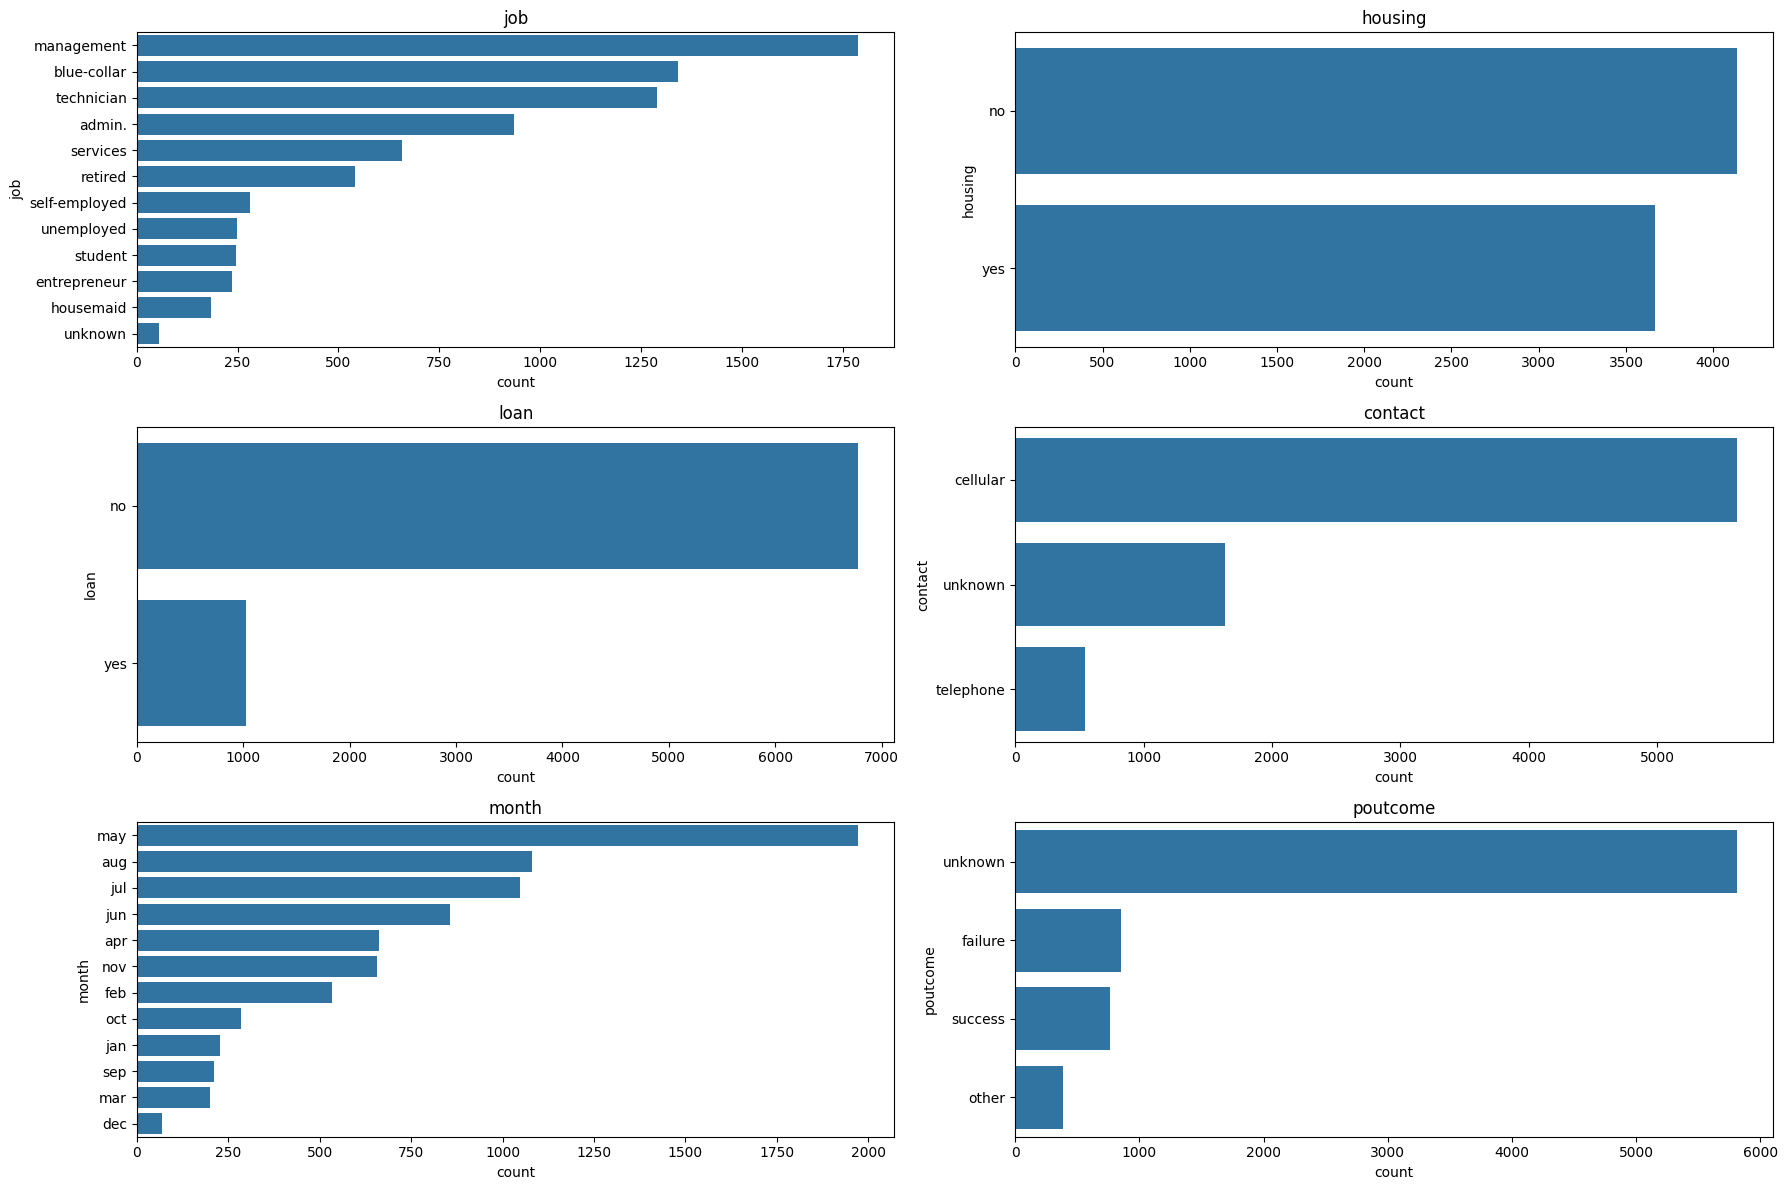

In [33]:
fig, axes = plt.subplots(3, 2, figsize=(18, 12)) 
for i, j in zip(categorical, axes.flatten()):
    ax = sns.countplot(data=data, y= i, ax= j, order=data[i].value_counts().index)
    ax.set_title(f'{i}', size = 12) 

plt.tight_layout()
plt.show()

| Feature | Interpretasi |
|--------------------------------|----------------------------------------------------------------------|
| `job` | pekerjaan yang paling umum adalah 'manajemen', sedangkan yang paling sedikit adalah 'housemaid'. Terdapat 'unknown' pada `job` yang harus diperhatikan |
| `housing` dan `loan`| sebagian besar nasabah memiliki kredit perumahan namun tidak memiliki hutang pribadi |
| `contact` | metode yang paling ummum digunakan adalah telepon celuller. Terdapat 'unknown' pada `contact` yang harus diperhatikan |
| `month` | frekuensi campaign berbeda-beda setiap bulannya, namun Mei merupakan bulan dengan frekuensi tertinggi, sedangkan Desember adalah yang terendah |
| `poutcome` | hasil campaign 'unkonwn' merupakan yang paling banyak pada `putcome`, hal ini perlu diperhatikan dan dipertimbangkan apakah kolom ini akan dipakai atau tidak? Mengingat 'unkown' terlalu mendominasi kolom ini |

#### **Feature vs Target**

In [34]:
def create_plot(data, col, x_maks=1000):

    agg_table = data.groupby([col, 'deposit']).size().unstack().reset_index()
    agg_table['total'] = agg_table['yes']+agg_table['no']
    agg_table['% deposit'] = (agg_table['yes']/agg_table['total']*100).round(2)
    agg_table = agg_table.sort_values(by='% deposit', ascending=False)
    agg_table

    fig, axes = plt.subplots(1, 2, figsize=(16,5))

    ax1 = sns.barplot(data=agg_table, y=col, x='% deposit', ax=axes[0])
    label = ['{:.1f} %'.format(x) for x in ax1.containers[0].datavalues]
    ax1.bar_label(ax1.containers[0], labels=label, padding=3, label_type='center')
    ax1.set_title(f'Percentage of deposit passengers by {col}')

    ax2 = sns.countplot(data=data, y=col, hue='deposit', order=agg_table[col], ax=axes[1])
    ax2.set_title(f'Number of customer by {col} and deposit')
    for container in ax2.containers:
        ax2.bar_label(container)
    ax2.set_xlim(0, x_maks)

    plt.tight_layout()
    plt.show()

##### **Feature `job`**

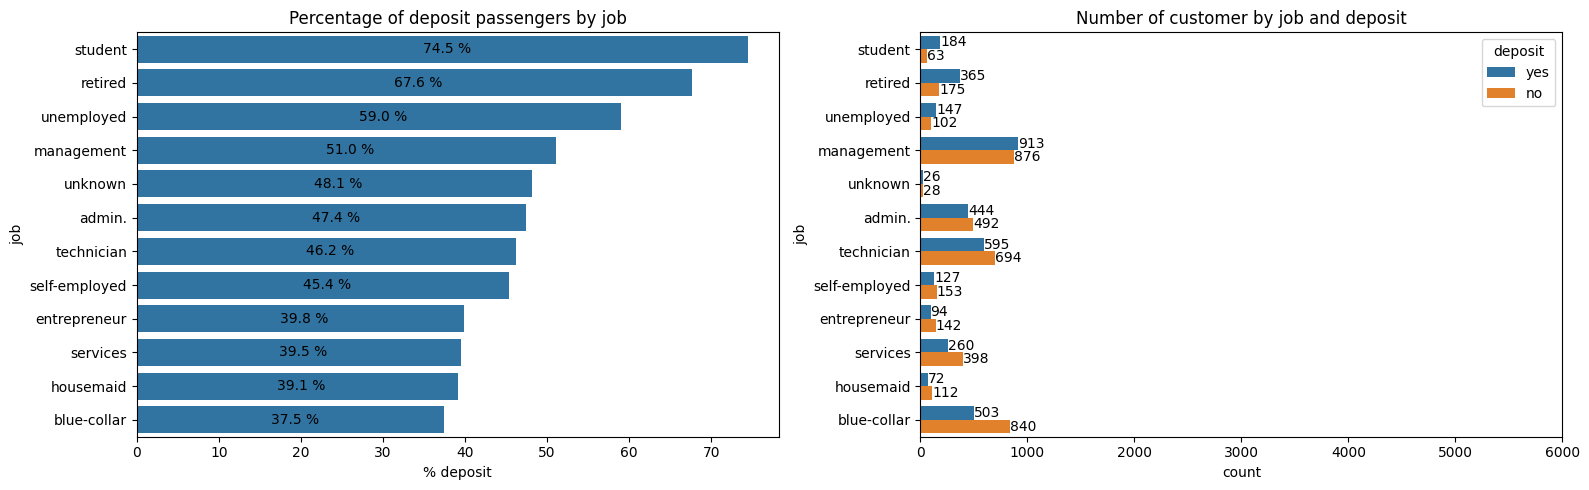

In [35]:
create_plot(data, 'job', x_maks=6000)

Interpretasi:

- Berdasarkan % deposito tertinggi, kategori 'student' dan 'retired' memiliki prosentase tertinggi pada data, yang dapat menunjukkan bahwa kategori tersebut cenderung melakukan deposito. Sedangkan untuk blue-collar memiliki prosentase deposito terendah, yang menunjukkan bahwa nasabah pada kategori ini kurang cenderung melakukan deposito.

- Berdasarkan jumlah nasabah, kategori 'management', 'technician', 'blue-collar', 'admin', dan 'service' menunjukkan jumlah yang signifikan pada deposit 'yes', sehingga bank dapat mempertimbangkan kategori tersebut sebagai target potensial untuk campaign deposito.

- Berdasarkan distribusi `job` terhadap `deposit` terlihat bahwa sebaiknya dilakukan pengelompokkan data. Namun, tidak bijak jika melakukan pengelompokkan data berdasarkan segmentasi jenis penghasilan ataupun blue-collar/white-collar. Sehingga dilakukan pengelompokkan data menggunakan K-means dengan feature '% deposit' dan 'jumlah nasabah', dengan jumlah cluster ditentukan berdasarkan elbow/ silhouette score. Dengan demikian, akan didapatkan kategori berdasarkan kecenderungan untuk deposito dan ukuran populasi dalam tiap kategori. 

**Clustering `job`**

- Feature `job` memiliki 12 nilai unik, berdasarkan hasil feature vs target, segmentasi `job` kurang tepat jika menggunakan domain knowledge, sehingga dilakukan clustering berdasrakan dua feature dalam feature vs target, yaitu berdasarkan total nasabah pada setiap kategorinya dan % keberhasilan investasi deposit pada setiap kategori (deposit='yes'). Hal ini disebabkan oleh pentingnya kedua parameter tersebut dalam menentukan kategori yang potensial, yang dapat mengidentifikasi kelompok dari kategori dengan potensi terbaik.

In [36]:
# agg_table_job

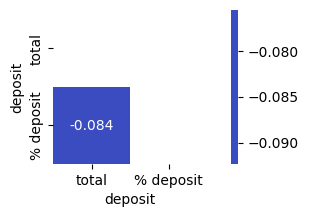

In [37]:
agg_table_job = data.groupby(['job', 'deposit']).size().unstack().reset_index()
agg_table_job['total'] = agg_table_job['yes']+agg_table_job['no']
agg_table_job['% deposit'] = (agg_table_job['yes']/agg_table_job['total']*100).round(2)
agg_table_job = agg_table_job.sort_values(by='% deposit', ascending=False)
agg_table_job

# (agg_table_job[['total','% deposit']].corr(method='spearman', numeric_only=True))
plt.figure(figsize=(6, 2))

matrix = np.triu(agg_table_job[['total','% deposit']].corr(method='spearman', numeric_only=True))
sns.heatmap(data=agg_table_job[['total','% deposit']].corr(method='spearman', numeric_only=True), annot=True, cmap='coolwarm', center=0, mask = matrix, square='True')
plt.show()

- Korelasi antara total dan % deposit sangat lemah, artinya tidak ada pola atau hubungan signifikan antara keduanya. 

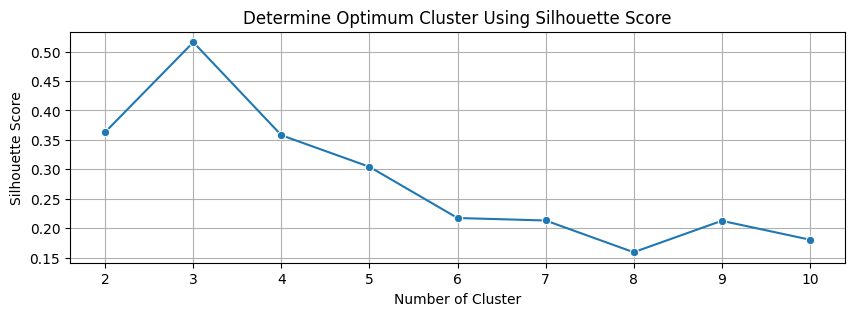

In [38]:
# K-MEANS dengan Silhouette Score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# define feature
X = agg_table_job[['total','% deposit']]

# define scaler
scaler = StandardScaler()

# fitting scaler to data
scaler.fit(X)

# transform
X_scaled = scaler.transform(X)

from sklearn.metrics import silhouette_score
number_of_clusters = range(2, 11)
score = []
for k in number_of_clusters:

    # define kmeans
    kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto')

    # fitting
    kmeans.fit(X_scaled)

    # labels
    label = kmeans.labels_

    # evaluate
    sil_score = silhouette_score(X_scaled, labels=label, metric='euclidean')
    score.append(sil_score)
    # print(sil_score)
plt.figure(figsize=(10,3))
sns.lineplot(y=score, x=number_of_clusters, marker='o')
plt.xlabel('Number of Cluster')
plt.ylabel('Silhouette Score')
plt.title('Determine Optimum Cluster Using Silhouette Score')
plt.grid()
plt.show()

In [39]:
# Agglomerative dengan Silhouette Score

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

number_of_clusters = range(2,11)
methods=['ward', 'complete', 'average']

linkage=[]
n_cluster= []
sil_score=[]

for method in methods:
    for k in number_of_clusters:
        # define model
        model= AgglomerativeClustering(linkage=method, n_clusters=k)
        # fit and predict
        labels=model.fit_predict(X_scaled)
        # evaluate
        score=silhouette_score(X_scaled, labels, random_state=0)
        # store to the list
        linkage.append(method)
        n_cluster.append(k)
        sil_score.append(score)
df_score=pd.DataFrame({
    'method': linkage,
    'cluster': n_cluster,
    'silhouette': sil_score
})
df_score.sort_values('silhouette',ascending=False)



,method,cluster,silhouette
19,average,3,0.515908
1,ward,3,0.515908
10,complete,3,0.471197
2,ward,4,0.429367
20,average,4,0.429367
18,average,2,0.415861
0,ward,2,0.415861
11,complete,4,0.389520
9,complete,2,0.363396
21,average,5,0.302019


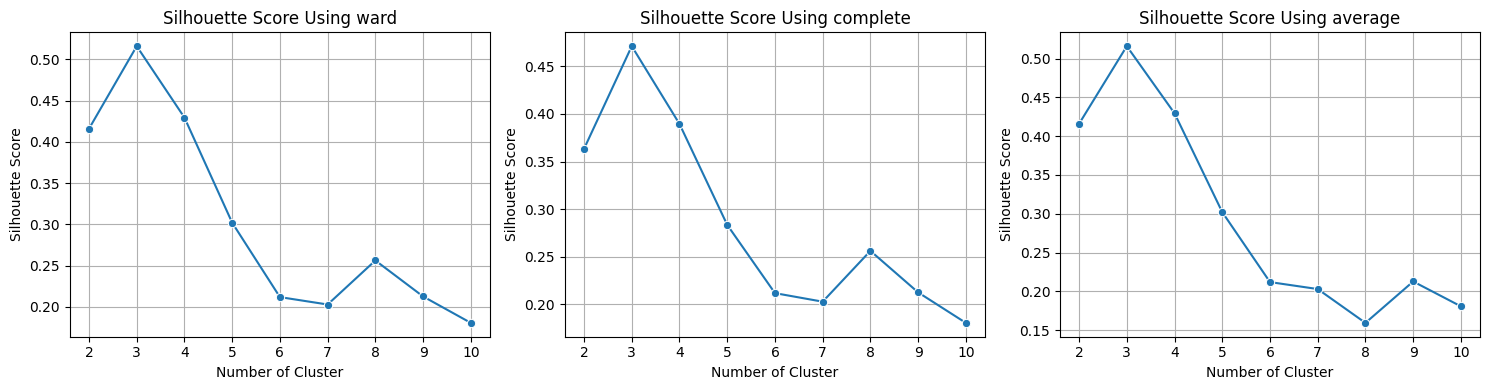

In [40]:
plt.figure(figsize=(15,4))
plot=1

for method in methods:
    plt.subplot(1,3,plot)
    sns.lineplot(data=df_score[df_score['method']==method], x='cluster', y='silhouette', marker='o')
    plt.title(f'Silhouette Score Using {method}')
    plt.xlabel('Number of Cluster')
    plt.ylabel('Silhouette Score')
    plot+=1
    plt.grid()
plt.tight_layout()
plt.show()

Interpretasi :
- Berdasarkan perhitungan clustering K-means baik dengan Silhouette Score serta clustering Agglomerative dengan Silhouette Score, didapatkan bahwa cluster terbaik adalah tiga. Sehingga akan dilakukan segmentasi feature `job` dalam tiga cluster.
- Nilai Silhouette Score untuk setiap metode clustering: 
    - k-means : 0.515908
    - average :	0.515908
    - ward    : 0.515908
    - complete:	0.471197

- Akan dilakukan clustering dengan Agglomerative-ward, karena tidak dipengaruhi oleh nilai random dan Silhouette Score nya tinggi.

In [41]:
# define final model
ward = AgglomerativeClustering(n_clusters=3, linkage='ward')
ward_labels = ward.fit_predict(X_scaled)
# agg_table_job[['total','% deposit']]
agg_table_job['ward'] = ward_labels
agg_table_job.sort_values('ward')

deposit,job,no,yes,total,% deposit,ward
4,management,876,913,1789,51.03,0
0,admin.,492,444,936,47.44,0
9,technician,694,595,1289,46.16,0
1,blue-collar,840,503,1343,37.45,0
8,student,63,184,247,74.49,1
5,retired,175,365,540,67.59,1
10,unemployed,102,147,249,59.04,1
11,unknown,28,26,54,48.15,2
6,self-employed,153,127,280,45.36,2
2,entrepreneur,142,94,236,39.83,2


Interpretasi:

- Ward 0 : 'management', 'admin.', 'technician', dan 'blue-collar'. Cluster ini cenderung memiliki prosentasi deposit antara 37-51% (moderat) dengan total nasabah yang tinggi. 

- Ward 1 : 'student', 'retired', dan 'unemployed'. Cluster ini cenderung memiliki prosentasi deposit antara 59-74% (tinggi) dengan total nasabah lebih rendah.
- Ward 2 : 'unknown', 'self-employed entrepreneur', 'services', dan 'housemaid'. Cluster ini cenderung memiliki variasi signifikan pada prosentase deposit dan total nasabah.

In [42]:
data.head()

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit,cat_age
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes,Middle-Age
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes,Adults
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes,Middle-Age
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no,Adults
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no,Adults


In [43]:
ward0=['management', 'admin.', 'technician', 'blue-collar']
ward1=['student', 'retired','unemployed']
ward2=['unknown', 'self-employed', 'entrepreneur', 'services', 'housemaid']

def cate_job(job):
    if job in ward0:
        return 'job1'
    elif job in ward1:
        return 'job2'
    elif job in ward2:
        return 'job3'
    else:
        return 'unknown'

data['cat_job']=data['job'].apply(cate_job)

data

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit,cat_age,cat_job
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes,Middle-Age,job1
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes,Adults,job3
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes,Middle-Age,job1
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no,Adults,job3
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no,Adults,job3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7808,62,housemaid,2,no,no,cellular,nov,1,-1,unknown,yes,Old,job3
7809,48,housemaid,5473,no,no,cellular,feb,2,184,success,yes,Middle-Age,job3
7810,36,unknown,179,no,no,cellular,aug,8,-1,unknown,no,Adults,job3
7811,31,admin.,54,yes,no,cellular,nov,1,-1,unknown,no,Adults,job1


In [44]:
data['cat_job'].value_counts()

cat_job
job1    5357
job3    1412
job2    1036
Name: count, dtype: int64

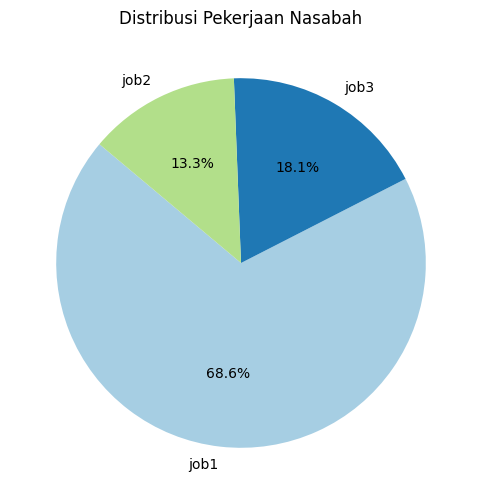

In [45]:
job_counts = data['cat_job'].value_counts()

# Buat pie chart
plt.figure(figsize=(8, 6))
plt.pie(job_counts, labels=job_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(job_counts))))
plt.title('Distribusi Pekerjaan Nasabah')
plt.show()

##### **Feature `housing`**

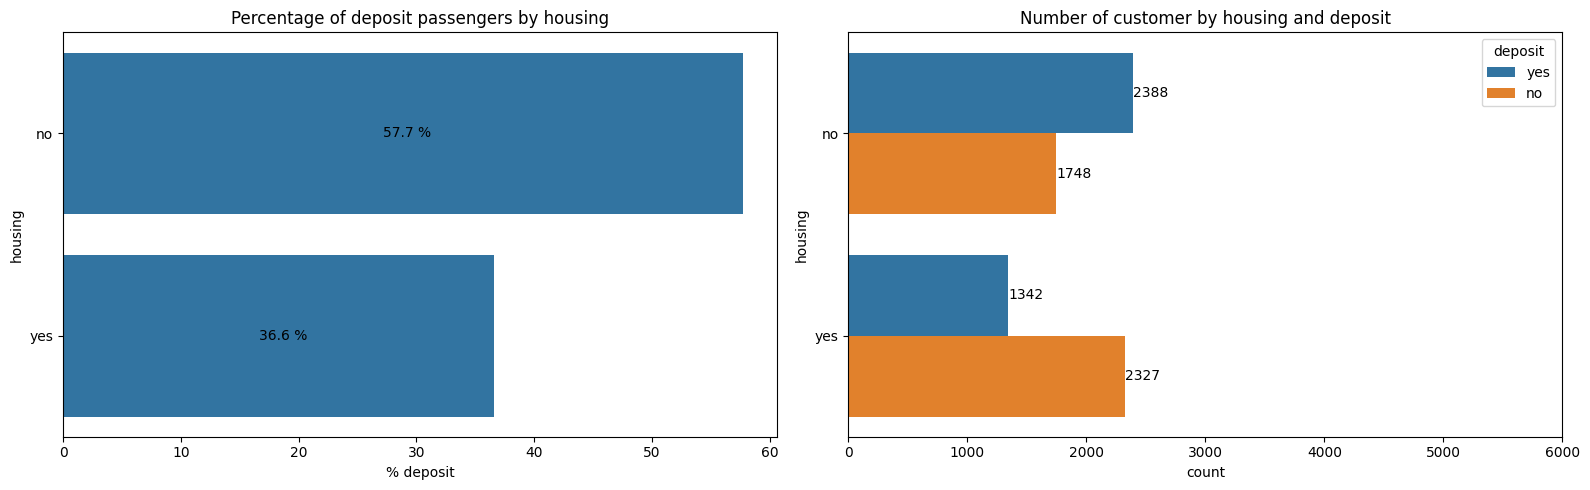

In [ ]:
create_plot(data, 'housing', x_maks=6000)

Interpretasi:

- Nasabah yang tidak memiliki rumah memiliki prosentase deposit serta total nasabah yang lebih tinggi cenderung menggunakan deposito  dibandingkan nasabah yang memiliki rumah. Hal ini dapat menunjukkan bahwa nasabah yang tidak memiliki rumah, mungkin memiliki dana yang lebih karena tidak melakukan investasi pada rumah, sehingga memilih investasi pada deposito.

- Nasabah yang memiliki rumah juga ada yang berinvestasi pada deposito, dengan jumlah yang cukup signifikan.

##### **Feature `loan`**

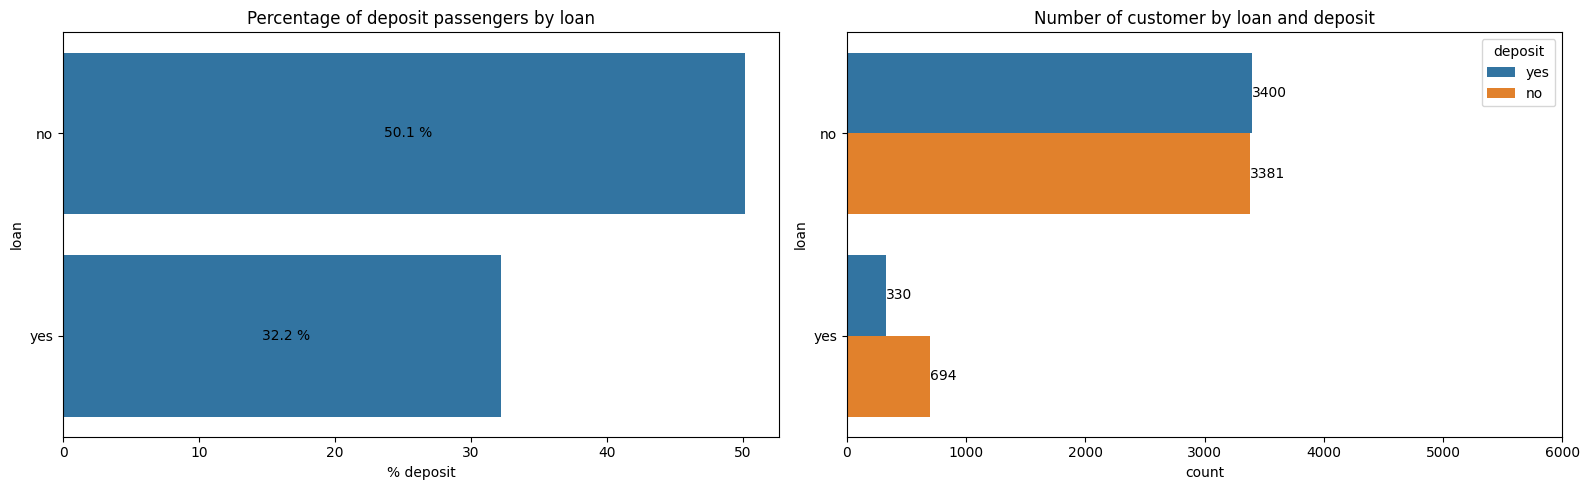

In [ ]:
create_plot(data, 'loan', x_maks=6000)

Interpretasi:

- Nasabah yang tidak memiliki hutang memiliki prosentase deposit serta total nasabah yang lebih tinggi cenderung menggunakan deposito  dibandingkan nasabah yang memiliki hutang. Hal ini dapat menunjukkan bahwa nasabah yang tidak memiliki hutang, mungkin memiliki dana yang lebih sehingga memilih investasi pada deposito.

- Nasabah yang tidak memiliki hutang hampir seimbang komposisinya jika dilihat dari yang berinvestasi dan tidak.

- Nasabah yang memiliki hutang terlihat ada juga yang berinvestasi pada deposito, namun lebih sediikit dibadningkan yang tidak melakukan investasi.

##### **Feature `contact`**

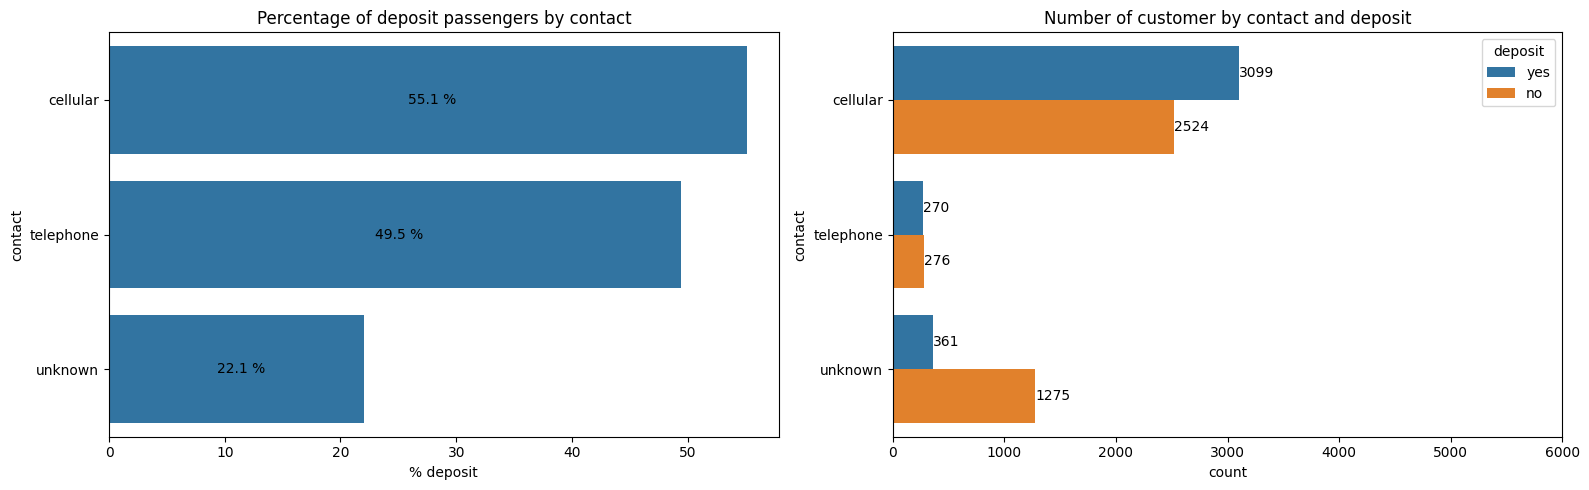

In [ ]:
create_plot(data, 'contact', x_maks=6000)

Interpretasi:

- Cellular menjadi media yang paling efektif untuk membuat nasabah berinvestasi pada deposito, dengan prosentasi tertinggi dan tingkat keberhasilan pada 'yes' lebih tinggi dari 'no'. Hal ini dapat mengindikasikan adanya kemungkinan komunikasi via cellular lebih mempengaruhi keputusan nasabah.

- Telephone menjadi media efektif kedua, dengan prosentase deposito yang juga tinggi walaupun dengan total yang terkecil.

- Other menjadi media yang prosentase depositnya terendah dan menghasilkan penolakan lebih tinggi daripada penerimaan pada investasi deposito. Hal ini menunjukkan bahwa media ini kurang efektif, namun karena Other merupakan replace value dari unknown, sekali lagi, ini menjadi hal yang perlu diperhatikan oleh bank agar diisi dengan sesuai, sehingga other ini bisa lebih menggambarkan media contact yang ada.

##### **Feature `month`**

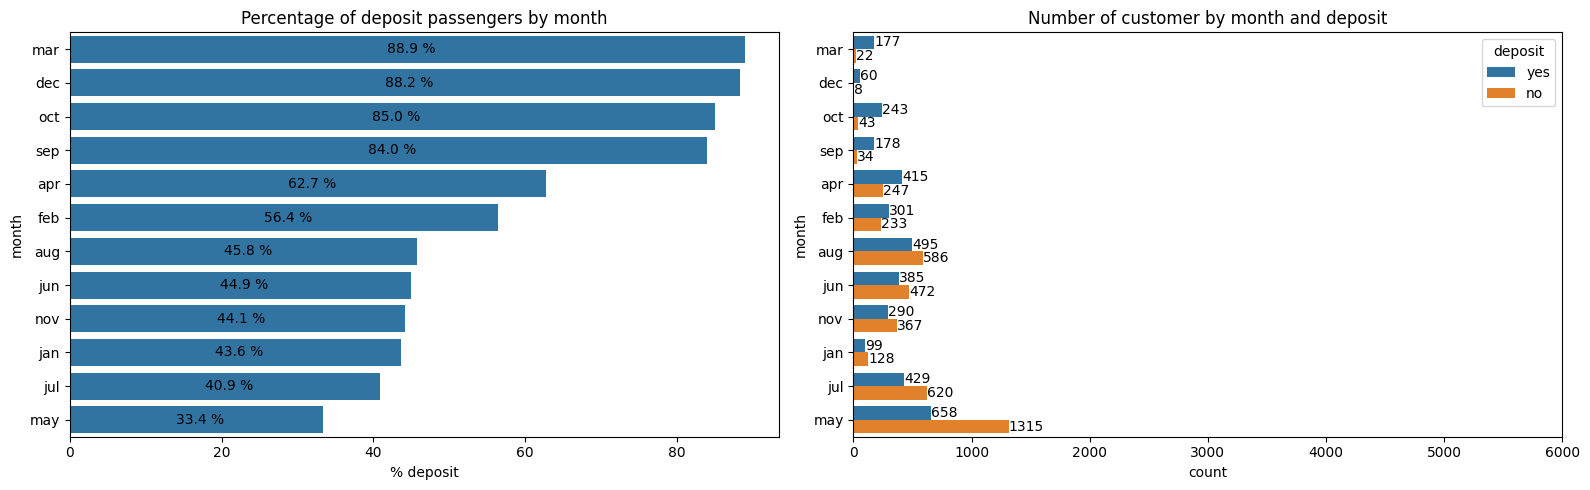

In [ ]:
create_plot(data, 'month', x_maks=6000)

Interpretasi:

- Maret, Desember, Oktober, September merupakan bulan dengan prosenatse keberhasilan deposit yang tinggi walaupun total nasabah yang dihubungi tidak setinggi bulan lain. Hal ini dapat mengindikasikan waktu yang lebih efektif dalam mendorong nasabah berinvestasi.

- April dan Februari menjadi bulan yang menunjukkan kombinasi terbaik antara total nasabah yang dihubungi denga prosentasi keberhasilan investasi. Strateginya dapat dipertimbangkan untuk mendorong nasabah investasi deposito pada bulan lainnya.

- Mei merupakan bulan dimana nasabah paling banyak dihubungi namun prosentase keberhasilan investasinya rendah. Hal ini dapat mengindikasikan bahwa hanya sebagain kecil dari nasabah pada bulan Mei yang melakukan investasi dan menjadi indikasi diperlukan strategi yang lebih baik untuk pemasaran pada bulan ini.

- Januari juga bulan dimana jumlah nasabah yang dihubungi tidak setinggi bulan lainnya dan tidak menghasilkan prosentase yang besar dalam investasi deposito, yang dapat mengindikasikan perlunya evaluasi pada strategi campaign bulan ini.

- Agustus, Juni, November, dan Juli memerlukan perbaikan dalam stratergi campaign yang dilakukan untuk meningkatkan keberhasilan investasi nasabah.

##### **Feature `poutcome`**

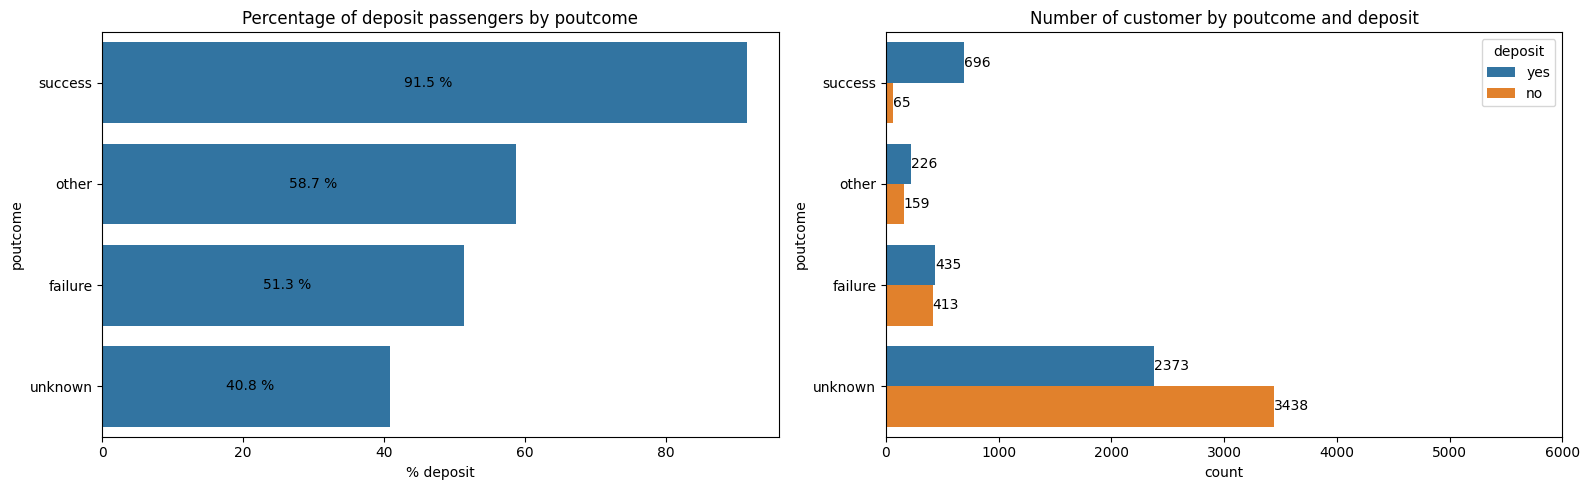

In [ ]:
create_plot(data, 'poutcome', x_maks=6000)

Interpretasi:

- Pertimbangan untuk tetap menggunakan kolom `poutcome`
    - Kategori selain 'unknown' menggambarkan infoemasi untuk memprediksi deposito. Kategori 'success' dan 'other' menunjukkan prosentasi keberhasilan investasi deposito yang cukup baik, sedangkan 'failure' dan 'unknown' dengan total nasabah yang besar menunjukkan potensi keberhasialan yang lebih rendah.
    - Namun dengan hampir 75% data berada pada kategori 'unknown', kategori ini dapat menyebabkan ketidakvalidan dalam model jika dilakukan encoding.
    - Jika tetap menggunakaan 'unknown', maka value negatif pada `pdays` harus depertimbangkan juga untuk dilakukan penanganan atau dijadikan sebagai kategori saja.

- Langkah-langkan **JIKA** tidak menggunakan kolom `poutcome`
    - Melatih dan mengevaluasi model tanpa fitur `poutcome` untuk melihat apakah terdapat perubahan signifikan pada kinerja model.
    - Bandingkan hasil model dengan feature `poutcome` dan tanpa feature `poutcome` menggunakan F1-Score.
    - Analisa apakah feature `poutcome` memberikan kontribusi positif atau negatif?

- Pertimbangkan untuk menggunakan `poutcome` dipertahankan namun tidak mebuang baris 'unknown', karena mayoritas feature ini diisi oleh kategori 'unknown', namun realisasinya terhadap deposito hanya 40.8%.

## **4. Data Preprocessing**

### **Outliers**

In [ ]:
def calculate_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

outlier_data = []

numerical = ['age', 'balance']

for column in numerical:
    outlier_result, lower_bound, upper_bound = calculate_outliers(data, column)
    total_outlier = len(outlier_result)
    outlier_percentage = round(total_outlier / len(data[column]) * 100, 2)
    outlier_data.append([column, total_outlier, outlier_percentage, lower_bound, upper_bound])

outlier_df = pd.DataFrame(outlier_data, columns=["Column", "Total Outliers", "Percentage (%)", "Lower Bound", "Upper Bound"])
outlier_df

,Column,Total Outliers,Percentage (%),Lower Bound,Upper Bound
0,age,121,1.55,6.5,74.5
1,balance,736,9.43,-2207.5,4020.5


Interpretasi:

- Terdapat outlier pada kolom numerikal dengan persentase sekitar 1.55% - 9.43%. Kita akan mengecek proporsi dari target pada data outlier tersebut.

In [ ]:
proportion = []
indeces = []

for i, row in outlier_df.iterrows():
    outlier = data[(data[row['Column']] < row['Lower Bound']) | (data[row['Column']] > row['Upper Bound'])]
    percentages = (outlier['deposit'].value_counts(normalize=True)*100).values
    proportion.append(percentages)
    indeces.append(row['Column'])

pd.DataFrame(proportion, columns=['no', 'yes'], index=indeces)

,no,yes
age,77.685950,22.314050
balance,58.559783,41.440217


Interpretasi:

- Berdasarkan proporsi dari target pada data outlier, didapatkan bahwa outlier pada `age` dan `balance` memiliki porporsi 'yes' dan 'no' yang sama dengan kondisi awal. 

- `age` : 

    - Outlier tidak terlalu signifikan (1,55% dari total), mungkin tidak perlu penanganan secara khusus. Namun telah dilakukan proses segmentasi `age` berdasarkan domain knowledge agar lebih menggambarkan segmentasi umur dan mempermudah pemodelan (mengecilkan variasi).
    

- `balance` : 

    - Outlier pada feature ini cukup signifikan (9.43% dari total), dan propossi depositnya cukup signifikan dalam outlier, sehingga mungkin perlu penanganan khusus.

    - Mempertimbangkan melakukan binning `balance` sehingga dapat menangani outlier.

### **Collinearity**

In [ ]:
def calculate_vif(data):
    vif = pd.DataFrame()
    vif['Feature'] = data.columns
    vif['VIF'] = [variance_inflation_factor(data.dropna(), i) for i in range(len(data.columns))]

    return vif.sort_values('VIF', ascending=False)

Kita akan melakukan pengujian berulang hingga diperoleh nilai VIF < 10.

In [ ]:
vif_df = calculate_vif(data[numerical])
dropped_columns = []

for i in range(len(vif_df)):
    if vif_df.iloc[0, -1] < 10:
        break
    else:
        dropped_columns.append(vif_df.iloc[0, 0])
        vif_df = calculate_vif(data[numerical].drop(columns=dropped_columns))

In [ ]:
vif_df

,Feature,VIF
0,age,1.250447
1,balance,1.250447


In [ ]:
dropped_columns

[]

Interpretasi:

- `age` dan `balance` tidak memiliki multikolinearitas yang signifikan. Hal ini mengindikasikan bahwa feature-feature ini tidak saling berhubungan. Sehingga tidak diperlukan tindakan khusus untuk menangani multikolinearitas untuk feature ini. 

### **Cardinality**

In [ ]:
categorical = [var for var in data.drop(columns='deposit').columns if data[var].dtypes == 'object']

In [ ]:
# creating a function to check cardinality
def check_cardinality(data):
    for feature in categorical:
        cardinality = len(data[feature].unique())
        print(f"Cardinality of {feature}: {cardinality}")

        if cardinality > 10:
            print(f"Warning: High cardinality in {feature}.")

check_cardinality(data)

Cardinality of job: 12
Cardinality of housing: 2
Cardinality of loan: 2
Cardinality of contact: 3
Cardinality of month: 12
Cardinality of poutcome: 4
Cardinality of cat_age: 4
Cardinality of cat_job: 3


Interpretasi:

- High Cardinality (seperti pada `job` dan `month`) memerlukan pendekatan khusus untuk dipertimbangkan dalam proses binning/clustering, lalu encoding untuk menghindari masalah dengan dimensi tinggi dan overfitting.

### **Imbalance Data**

In [ ]:
# Check the class distribution 
from collections import Counter

print("Class distribution:", Counter(data['deposit']))

Class distribution: Counter({'no': 4075, 'yes': 3730})


In [ ]:
prosentase_deposit=(data['deposit'].value_counts(normalize=True)*100).round(2)
prosentase_deposit

deposit
no     52.21
yes    47.79
Name: proportion, dtype: float64

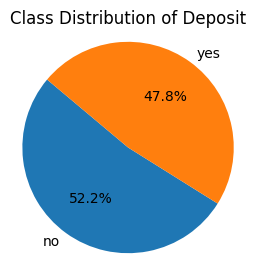

In [ ]:
plt.figure(figsize=(3, 3))
plt.pie(prosentase_deposit, labels=prosentase_deposit.index, autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution of Deposit')
plt.axis('equal') 
plt.show()

Interpretasi:

- Berdasarkan tabel [imbalance](https://developers.google.com/machine-learning/crash-course/overfitting/imbalanced-datasets):

    | Percentage of data belonging to minority class | Degree of imbalance |
    | ----------------------------- | ----------- |
    | 20-40% of the dataset | Mild |
    | 1-20% of the dataset | Moderate |
    | <1% of the dataset | Extreme |
>
- Data menunjukkan bahwa perbedaan antara 'yes' dan 'no' dalam `deposit` tidak cukup besar (4.42%) untuk katakan sebagai data imbalance. Sehingga tidak akan dilakukan resampling data.


### **Feature Engineering**

- Sebelum memutuskan untuk menggunakan feature yang mana atau proses encodingnya seperti apa, dilakukan eksperimen berdasarkan skenario feature (berdasarkan hasil eksplorasi data dan feature vs target pada bab sebelumnya) yang akan digunakan dan proses encoding yang akan digunakan. Yang secara lengkap dapat dilihat pada file **experiment_model.ipynb**

- Skenario :

    - Skenario 1 : eksperimen tanpa menggunakan feature `pdays` dan `poutcome` 

    - Skenario 2 : eksperimen tanpa menggunakan feature `pdays`

    - Skenario 3 : eksperimen menggunakan semua feature yang ada

- Eksperimen model :

    - Eksperimen model 1 :

        - Data lengkap tidak ada yang dihapus. (dengan Skenario 1, Skenario 2, dan Skenario 3)

        - Model yang dibandingkan:

            - LogisticRegression, KNeighborsClassifier, DecisionTreeClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, dan XGBClassifier

        - Encoding :

            | **Encoder Type** | **Encoder Object**         | **Columns Transformed**         |
            |------------------|----------------------------|---------------------------------|
            | Ordinal          | `OrdinalEncoder()`         | `cat_age`                        |
            | One-Hot           | `OneHotEncoder(drop='first')` | `cat_job`, `housing`, `loan`, `contact` |
            | Binary            | `BinaryEncoder()`          | `month`                          |

    - Eksperimen model 2 :

        - Data lengkap tidak ada yang dihapus. (dengan Skenario 1, Skenario 2, dan Skenario 3)

        - Model yang dibandingkan:LogisticRegression, KNeighborsClassifier, DecisionTreeClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, dan XGBClassifier

        - Encoding:

            | **Transformer Type**     | **Transformer Object**                                                 | **Columns Transformed**                     |
            |--------------------------|------------------------------------------------------------------------|---------------------------------------------|
            | Ordinal                  | `OrdinalEncoder()`                                                      | `cat_age`                                   |
            | Binning Ordinal          | `KBinsDiscretizer(n_bins=5, strategy='uniform', encode='ordinal')`      | `balance`                                   |
            | One-Hot                   | `OneHotEncoder(drop='first')`                                            | `cat_job`, `housing`, `loan`, `contact`     |
            | Binary                   | `BinaryEncoder()`                                                        | `month`                                     |
    
    - Ekperimen model 3 :

        - Data di filter tanpa ((data['balance']<0)&(data['deposit']==1)). (dengan Skenario 1, Skenario 2, dan Skenario 3)
    
        - Model yang dibandingkan : LogisticRegression, KNeighborsClassifier, DecisionTreeClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, dan XGBClassifier

        - Encoding :

            | **Transformer Type**     | **Transformer Object**                                                 | **Columns Transformed**                     |
            |--------------------------|------------------------------------------------------------------------|---------------------------------------------|
            | Ordinal                  | `OrdinalEncoder()`                                                      | `cat_age`                                   |
            | Binning Ordinal          | `KBinsDiscretizer(n_bins=5, strategy='uniform', encode='ordinal')`      | `balance`                                   |
            | One-Hot                   | `OneHotEncoder(drop='first')`                                            | `cat_job`, `housing`, `loan`, `contact`     |
            | Binary                   | `BinaryEncoder()`                                                        | `month`                                     |
    
    - Ekperimen model 4 :

        - Data di filter tanpa ((data['balance']<0)&(data['deposit']==1)). (dengan Skenario 1, Skenario 2, dan Skenario 3)
    
        - Model yang dibandingkan : LogisticRegression, KNeighborsClassifier, DecisionTreeClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, XGBClassifier, LGBMClassifier, CatBoostClassifier, MLPClassifier, dan SVC

        - Encoding :

            | **Encoder Type** | **Encoder Object**         | **Columns Transformed**         |
            |------------------|----------------------------|---------------------------------|
            | Ordinal          | `OrdinalEncoder()`         | `cat_age`                        |
            | One-Hot           | `OneHotEncoder(drop='first')` | `cat_job`, `housing`, `loan`, `contact` |
            | Binary            | `BinaryEncoder()`          | `month`                          |
    
    - Ekperimen model 5 :

        - Data di filter tanpa ((data['balance']<0)&(data['deposit']==1)). Menggunakan feature `age` bukan `cat_age`. (dengan Skenario 1, Skenario 2, dan Skenario 3)
    
        - Model yang dibandingkan : LogisticRegression, KNeighborsClassifier, DecisionTreeClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, XGBClassifier, LGBMClassifier, CatBoostClassifier, MLPClassifier, dan SVC

        - Encoding :

            | **Encoder Type** | **Encoder Object**         | **Columns Transformed**         |
            |------------------|----------------------------|---------------------------------|
            | One-Hot           | `OneHotEncoder(drop='first')` | `cat_job`, `housing`, `loan`, `contact` |
            | Binary            | `BinaryEncoder()`          | `month`                          |    

    - Ekperimen model 6 :

        - Data di filter tanpa ((data['balance']<0)&(data['deposit']==1)). (dengan Skenario 1, Skenario 2, dan Skenario 3)
    
        - Model yang dibandingkan : LogisticRegression, KNeighborsClassifier, DecisionTreeClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, XGBClassifier, LGBMClassifier, CatBoostClassifier, MLPClassifier, dan SVC

        - Encoding :

            | **Transformer Type**     | **Transformer Object**                                                 | **Columns Transformed**                     |
            |--------------------------|------------------------------------------------------------------------|---------------------------------------------|
            | Ordinal                  | `OrdinalEncoder()`                                                      | `cat_age`                                   |
            | Binning Ordinal          | `KBinsDiscretizer(n_bins=5, strategy='uniform', encode='ordinal')`      | `balance`                                   |
            | One-Hot                  | `OneHotEncoder(drop='first')`                                            | `cat_job`, `housing`, `loan`, `contact`     |
            | Binary                   | `BinaryEncoder()`                                                        | `month`                                     |


- Scalling: Robust Scaler, karena terdapat data yang memiliki outlier. RobustScaler dapat membantu akurassi model dan stabilitas prediksi. Pada dataset, kita memiliki feature `balance` yang mana memiliki rentang nilai yang cukup besar, sehingga dengan robust kita akan dapat menyamakan skala dan mengurangi pengaruh dari outlier.

- Analisa Hasil :

    - Penbandingan Skenario 1 vs Skenario 2 Vs Skenario 3: berdasarkan modeling experiment, skenario 3 (dengan feature `pdays` dan `poutcome`) menunjukkan hasil yang lebih baik dibandingkan dengan skenario 1 dan skenario 2. Hal ini dapat menunjukan bahwa penambahan feature yang berkaitan mungkin dapat memberikan informasi tambahan yang berharga untuk model, yang meningkatkan kinerja secara keseluruhan. Hal ini juga dapat menjadi masukkan untuk Bank, untuk menambahkan feature-feature terkait nasabah dalam konteks persyaratan investasi deposito.

- Analisa Eksperimen :

    - Jika dibandingkan performa dari eksperimen 1 sampai 6, didapatkan bahwa eksperiment 4 dengan skenario 3 adalah yang terbaik.

- Bedasarkan eksperimen pemilihan data, modeling, encoding, dan skenario, maka kita akan menggunakan :

    - Data di filter tanpa ((data['balance']<0)&(data['deposit']==1))
        
    - Skenario yang digunakan : Skenario 3 eksperimen menggunakan feature `cat_age`, `cat_job`, `balance`, `housing`, `loan`, `contact`, `month`, `campaign`, `pdays`,`poutcome`,`deposit`
    
    - Model yang dibandingkan : LogisticRegression, KNeighborsClassifier, DecisionTreeClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, XGBClassifier, LGBMClassifier, CatBoostClassifier, MLPClassifier, dan SVC

    - Encoding :

        | **Encoder Type** | **Encoder Object**         | **Columns Transformed**         |
        |------------------|----------------------------|---------------------------------|
        | Ordinal          | `OrdinalEncoder()`         | `cat_age`                        |
        | One-Hot           | `OneHotEncoder(drop='first')` | `cat_job`, `housing`, `loan`, `contact` |
        | Binary            | `BinaryEncoder()`          | `month`                          |

#### **Replace Data**

In [ ]:
data['deposit']=data['deposit'].map({'yes':1, "no":0}).astype(int)


# **5. Modeling**

Pada experiment modeling kali ini, akan melibatkan filter data tambahan yaitu, data tanpa (data['balance']<0)&(data['deposit']==1) dan (data['poutcome'] == 'unknown'). Hal ini dilakukan untuk menunjukkan pada Bank bahwa data yang lebih valid atau yang sudah pernah mendapatkan hasil pada campaign sebelumnya, mungkin dapat menggambarkan potensi nasabah untuk target campaign selanjutnya.

- Pada analisa sebelumnya yang tertuang pada file 'main.ipynp', juga didapatkan bahwa (data['poutcome'] == 'unknown') merupakan feature yang tidak terlalu penting jika dilihat dari nilai kepentingannya, baik pada feature importance maupun analisa shap.

- Jika hal ini dilakukan, maka kasus klasifikasi pada modeling ini akan imbalance. Sehingga akan dilakukan pemodelan sesuai dengan data imbalance dan melihat hasilnya.


## **Scaller dan Resampler**

In [ ]:
# Scaling
scaler = RobustScaler()

In [ ]:
# Resampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
# Resampling
smote = SMOTE(random_state=0)
rus = RandomUnderSampler(random_state=0)
ros = RandomOverSampler(random_state=0)

resamplers = [rus, ros, smote]

## **Model Selection**

In [ ]:
# Define the models
from sklearn.ensemble import VotingClassifier, StackingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
# Logistic Regression 
logreg = LogisticRegression(max_iter=1000)

# KNN
knn = KNeighborsClassifier()

# Decision Tree
tree = DecisionTreeClassifier(random_state=0)

# RandomForest
rf = RandomForestClassifier(random_state=0)

# Adaboost
warnings.filterwarnings("ignore", category=FutureWarning, module='sklearn.ensemble._weight_boosting')
adaboost = AdaBoostClassifier( random_state=0)

# Gradientboost
gradboost = GradientBoostingClassifier(random_state=0)

# ExtremeGradientBoost
xgboost = XGBClassifier(random_state=0, verbosity=0)

# LightGradientBoosting
lgbm = lgb.LGBMClassifier(random_state=0)

# CatBoostClassifier
catboost = CatBoostClassifier(random_state=0, verbose=0)

# SupportVector
svm = SVC(probability=True, random_state=0)

# Multi-layerPerceptron
mlp = MLPClassifier(max_iter=500, random_state=0)

# Meta learner
meta_logreg = LogisticRegression(max_iter=1000)


# Base Models
logreg_pipeline = Pipeline([
    ('scaling', scaler),
    ('modeling', logreg)
])

knn_pipeline = Pipeline([
    ('scaling', scaler),
    ('modeling', knn)
])

dtree_pipeline = Pipeline([
    ('modeling', tree)
])
# Voting Classifier (Hard)
voting_hard = VotingClassifier(
    estimators=[
        ('clf1', logreg_pipeline),
        ('clf2', knn_pipeline),
        ('clf3', dtree_pipeline)
    ], voting='hard'
)

# Voting Classifier (Soft)
voting_soft = VotingClassifier(
    estimators=[
        ('clf1', logreg_pipeline),
        ('clf2', knn_pipeline),
        ('clf3', dtree_pipeline)
    ], voting='soft'
)

# Stacking Classifier
stacking = StackingClassifier(
    estimators=[
        ('clf1', logreg_pipeline),
        ('clf2', knn_pipeline),
        ('clf3', dtree_pipeline)
    ],
    final_estimator=meta_logreg
)


In [ ]:
filter_data=data[~((data['balance']<0)&(data['deposit']==1))]
filter_data =filter_data[filter_data['poutcome'] != 'unknown']
filter_data

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit,cat_age,cat_job
2,51,admin.,3025,no,no,cellular,may,1,352,other,1,Middle-Age,job1
7,36,technician,911,yes,yes,cellular,may,2,21,failure,1,Adults,job1
10,23,student,1234,no,no,cellular,feb,1,91,success,1,Young,job2
15,38,technician,88,no,no,cellular,nov,2,186,success,1,Adults,job1
18,31,technician,863,yes,no,cellular,feb,1,263,success,0,Adults,job1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7798,34,unemployed,978,no,no,cellular,jun,2,71,success,1,Adults,job2
7802,63,retired,12067,no,no,telephone,apr,1,191,failure,1,Old,job2
7804,52,admin.,423,yes,yes,cellular,oct,2,96,failure,0,Middle-Age,job1
7805,47,management,159,no,no,telephone,oct,3,155,other,1,Middle-Age,job1


In [ ]:
filter_data['deposit'].value_counts(normalize=True)

deposit
1    0.675827
0    0.324173
Name: proportion, dtype: float64

Interpretasi:
- data kali ini menunjukkan imbalance data

In [ ]:
# cek missing value dan tipe data
filter_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1965 entries, 2 to 7809
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       1965 non-null   int64 
 1   job       1965 non-null   object
 2   balance   1965 non-null   int64 
 3   housing   1965 non-null   object
 4   loan      1965 non-null   object
 5   contact   1965 non-null   object
 6   month     1965 non-null   object
 7   campaign  1965 non-null   int64 
 8   pdays     1965 non-null   int64 
 9   poutcome  1965 non-null   object
 10  deposit   1965 non-null   int32 
 11  cat_age   1965 non-null   object
 12  cat_job   1965 non-null   object
dtypes: int32(1), int64(4), object(8)
memory usage: 207.2+ KB


In [ ]:
filter_data.describe()

,age,balance,campaign,pdays,deposit
count,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000
mean,41.924682,1741.409160,1.888550,203.141985,0.675827
std,13.080373,2999.016936,1.302237,119.683373,0.468184
min,18.000000,-938.000000,1.000000,1.000000,0.000000
25%,32.000000,238.000000,1.000000,98.000000,0.000000
50%,38.000000,760.000000,1.000000,182.000000,1.000000
75%,50.000000,2046.000000,2.000000,278.000000,1.000000
max,93.000000,52587.000000,12.000000,854.000000,1.000000


In [ ]:
filter_data.describe(include=object)

,job,housing,loan,contact,month,poutcome,cat_age,cat_job
count,1965,1965,1965,1965,1965,1965,1965,1965
unique,12,2,2,3,12,3,4,3
top,management,no,no,cellular,may,failure,Adults,job1
freq,510,1109,1784,1811,415,832,1198,1332


## **Modeling Experiment Skenario 1**

In [ ]:
filter_data4=filter_data[['cat_age', 'cat_job', 'balance', 'housing', 'loan', 'contact', 'month', 'campaign', 'deposit']]
filter_data4.head()

,cat_age,cat_job,balance,housing,loan,contact,month,campaign,deposit
2,Middle-Age,job1,3025,no,no,cellular,may,1,1
7,Adults,job1,911,yes,yes,cellular,may,2,1
10,Young,job2,1234,no,no,cellular,feb,1,1
15,Adults,job1,88,no,no,cellular,nov,2,1
18,Adults,job1,863,yes,no,cellular,feb,1,0


### **Define Features (X) and Target (y)**

In [ ]:
# Features
X = filter_data4.drop(columns='deposit')

# target
y = filter_data4['deposit']

### **Data Splitting**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

### **Transformer**

In [ ]:
# Column Transformer

from sklearn.preprocessing import KBinsDiscretizer
preproceessor=ColumnTransformer(
    transformers=[
        ('ordinal', OrdinalEncoder(),['cat_age', ]),
        ('one hot', OneHotEncoder(drop='first'), ['cat_job', 'housing', 'loan', 'contact']),
        ('binary', BinaryEncoder(), ['month'])
    ],remainder='passthrough'
)
preproceessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinal', OrdinalEncoder(), ['cat_age']),
                                ('one hot', OneHotEncoder(drop='first'),
                                 ['cat_job', 'housing', 'loan', 'contact']),
                                ('binary', BinaryEncoder(), ['month'])])

### **Model Experiment**

In [ ]:
# Pilihan model
models = [logreg, knn, tree, rf, adaboost, gradboost, xgboost,lgbm,catboost,svm,mlp,voting_hard, voting_soft, stacking,]

f1_mean = []
f1_std = []
all_f1 = []
model_name = []

for algoritma in models:

    model_pipe = Pipeline([
        ('transformer', preproceessor),
        ('scaler', scaler),
        ('resampler', smote),
        ('model', algoritma)
    ])

    skfold = StratifiedKFold(n_splits = 5)

    model_cv = cross_val_score(
        estimator=model_pipe,                 # model yang sudah dimasukkan ke dalam pipeline
        X=X_train,                    # data sebelum di preprocessing
        y=y_train, 
        cv = skfold, 
        scoring = 'f1',
        error_score='raise'
        )
    
    f1_mean.append(model_cv.mean())
    f1_std.append(model_cv.std())
    all_f1.append(model_cv.round(4))
    model_name.append(algoritma.__class__.__name__)

[LightGBM] [Info] Number of positive: 849, number of negative: 849
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000255 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 442
[LightGBM] [Info] Number of data points in the train set: 1698, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 849, number of negative: 849
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000248 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 452
[LightGBM] [Info] Number of data points in the train set: 1698, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[Light

c:\Users\fauzi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\fauzi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\fauzi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\fauzi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the opti

In [ ]:
pd.DataFrame({
    'model': model_name,
    'mean': f1_mean,
    'std': f1_std,
    'all_score' : all_f1
}).sort_values('mean', ascending=False)

,model,mean,std,all_score
5,GradientBoostingClassifier,0.804821,0.017500,"[0.798, 0.7793, 0.8095, 0.8333, 0.8039]"
8,CatBoostClassifier,0.804252,0.012215,"[0.7862, 0.7972, 0.8224, 0.8047, 0.8107]"
7,LGBMClassifier,0.791716,0.005021,"[0.7857, 0.788, 0.8, 0.7906, 0.7943]"
3,RandomForestClassifier,0.790596,0.008481,"[0.784, 0.7982, 0.8018, 0.7898, 0.7791]"
6,XGBClassifier,0.783676,0.006607,"[0.7797, 0.7844, 0.7778, 0.7804, 0.7962]"
13,StackingClassifier,0.778190,0.011224,"[0.7797, 0.785, 0.7835, 0.7866, 0.7562]"
4,AdaBoostClassifier,0.769992,0.019557,"[0.76, 0.7426, 0.7961, 0.7882, 0.7631]"
11,VotingClassifier,0.762395,0.014366,"[0.7745, 0.7586, 0.7456, 0.7833, 0.75]"
12,VotingClassifier,0.762267,0.007464,"[0.7729, 0.7681, 0.7518, 0.7603, 0.7581]"
10,MLPClassifier,0.760547,0.018482,"[0.76, 0.7291, 0.7855, 0.77, 0.7581]"


In [ ]:
from sklearn.metrics import f1_score
list_f1 = []

# Mencari model terbaik berdasarkan f1 score terbesar dan std terkecil
for algoritma in models :

    model_pipe = Pipeline([
        ('transformer', preproceessor),
        ('scaler', scaler),
        ('resampler', smote),
        ('model', algoritma)
    ])

    # fitting
    model_pipe.fit(X_train, y_train)

    # predict
    y_pred = model_pipe.predict(X_test)

    # evaluate
    score = f1_score(y_test, y_pred)
    list_f1.append(score)

[LightGBM] [Info] Number of positive: 1062, number of negative: 1062
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000220 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 470
[LightGBM] [Info] Number of data points in the train set: 2124, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


c:\Users\fauzi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# Perbandingan performa antar model
pd.DataFrame({
    'model': model_name,
    'f1(test_set)': list_f1
}).sort_values('f1(test_set)', ascending=False)

,model,f1(test_set)
6,XGBClassifier,0.804598
8,CatBoostClassifier,0.795322
3,RandomForestClassifier,0.793103
7,LGBMClassifier,0.789981
5,GradientBoostingClassifier,0.783300
10,MLPClassifier,0.779381
4,AdaBoostClassifier,0.757085
11,VotingClassifier,0.748988
13,StackingClassifier,0.742515
12,VotingClassifier,0.737475


## **Modeling Experiment Skenario 2**

In [ ]:
filter_data

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit,cat_age,cat_job
2,51,admin.,3025,no,no,cellular,may,1,352,other,1,Middle-Age,job1
7,36,technician,911,yes,yes,cellular,may,2,21,failure,1,Adults,job1
10,23,student,1234,no,no,cellular,feb,1,91,success,1,Young,job2
15,38,technician,88,no,no,cellular,nov,2,186,success,1,Adults,job1
18,31,technician,863,yes,no,cellular,feb,1,263,success,0,Adults,job1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7798,34,unemployed,978,no,no,cellular,jun,2,71,success,1,Adults,job2
7802,63,retired,12067,no,no,telephone,apr,1,191,failure,1,Old,job2
7804,52,admin.,423,yes,yes,cellular,oct,2,96,failure,0,Middle-Age,job1
7805,47,management,159,no,no,telephone,oct,3,155,other,1,Middle-Age,job1


In [ ]:
filter_data5=filter_data[['cat_age', 'cat_job', 'balance', 'housing', 'loan', 'contact', 'month', 'campaign', 'poutcome','deposit']]
filter_data5.head()

,cat_age,cat_job,balance,housing,loan,contact,month,campaign,poutcome,deposit
2,Middle-Age,job1,3025,no,no,cellular,may,1,other,1
7,Adults,job1,911,yes,yes,cellular,may,2,failure,1
10,Young,job2,1234,no,no,cellular,feb,1,success,1
15,Adults,job1,88,no,no,cellular,nov,2,success,1
18,Adults,job1,863,yes,no,cellular,feb,1,success,0


### **Define Features (X) and Target (y)**

In [ ]:
# Features
X = filter_data5.drop(columns='deposit')

# target
y = filter_data5['deposit']

### **Data Splitting**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

### **Transformer**

In [ ]:
# Column Transformer

from sklearn.preprocessing import KBinsDiscretizer
preproceessor=ColumnTransformer(
    transformers=[
        ('ordinal', OrdinalEncoder(),['cat_age', ]),
        ('one hot', OneHotEncoder(drop='first'), ['cat_job', 'housing', 'loan', 'contact','poutcome']),
        ('binary', BinaryEncoder(), ['month'])
    ],remainder='passthrough'
)
preproceessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinal', OrdinalEncoder(), ['cat_age']),
                                ('one hot', OneHotEncoder(drop='first'),
                                 ['cat_job', 'housing', 'loan', 'contact',
                                  'poutcome']),
                                ('binary', BinaryEncoder(), ['month'])])

### **Model Experiment**

In [ ]:
# Pilihan model
models = [logreg, knn, tree, rf, adaboost, gradboost, xgboost,lgbm,catboost,svm,mlp,voting_hard, voting_soft, stacking,]



f1_mean = []
f1_std = []
all_f1 = []
model_name = []


# Mencari model terbaik berdasarkan rerata f1 score terkecil dan std terkecil
for algoritma in models:

    model_pipe = Pipeline([
        ('transformer', preproceessor),
        ('scaler', scaler),
        ('resampler', smote),
        ('model', algoritma)
    ])

    skfold = StratifiedKFold(n_splits = 5)

    model_cv = cross_val_score(
        estimator=model_pipe,                 # model yang sudah dimasukkan ke dalam pipeline
        X=X_train,                    # data sebelum di preprocessing
        y=y_train, 
        cv = skfold, 
        scoring = 'f1',
        error_score='raise'
        )
    
    f1_mean.append(model_cv.mean())
    f1_std.append(model_cv.std())
    all_f1.append(model_cv.round(4))
    model_name.append(algoritma.__class__.__name__)

[LightGBM] [Info] Number of positive: 849, number of negative: 849
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000342 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 501
[LightGBM] [Info] Number of data points in the train set: 1698, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 849, number of negative: 849
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000321 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 1698, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 850, number of negative: 850
[Li

c:\Users\fauzi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\fauzi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\fauzi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\fauzi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the opti

In [ ]:
pd.DataFrame({
    'model': model_name,
    'mean': f1_mean,
    'std': f1_std,
    'all_score' : all_f1
}).sort_values('mean', ascending=False)

,model,mean,std,all_score
8,CatBoostClassifier,0.830951,0.011650,"[0.8193, 0.8199, 0.8282, 0.8504, 0.837]"
5,GradientBoostingClassifier,0.827790,0.021788,"[0.798, 0.8048, 0.8469, 0.8482, 0.8411]"
3,RandomForestClassifier,0.817796,0.003242,"[0.815, 0.8205, 0.8211, 0.8194, 0.8129]"
7,LGBMClassifier,0.807350,0.011272,"[0.7933, 0.8056, 0.8, 0.8115, 0.8264]"
9,SVC,0.803530,0.013208,"[0.7815, 0.7951, 0.8137, 0.8122, 0.8152]"
6,XGBClassifier,0.803489,0.014399,"[0.8145, 0.8019, 0.7765, 0.8086, 0.816]"
13,StackingClassifier,0.801952,0.003485,"[0.8, 0.8, 0.8078, 0.8039, 0.7981]"
10,MLPClassifier,0.797490,0.010839,"[0.7971, 0.7775, 0.799, 0.8049, 0.8089]"
4,AdaBoostClassifier,0.795568,0.010904,"[0.806, 0.7864, 0.8089, 0.7959, 0.7806]"
11,VotingClassifier,0.793324,0.006279,"[0.7826, 0.799, 0.791, 0.8, 0.794]"


In [ ]:
list_f1 = []

# Mencari model terbaik berdasarkan f1 score terbesar dan std terkecil
for algoritma in models :

    model_pipe = Pipeline([
        ('transformer', preproceessor),
        ('scaler', scaler),
        ('resampler', smote),
        ('model', algoritma)
    ])

    # fitting
    model_pipe.fit(X_train, y_train)

    # predict
    y_pred = model_pipe.predict(X_test)

    # evaluate
    score = f1_score(y_test, y_pred, average='macro')
    list_f1.append(score)

[LightGBM] [Info] Number of positive: 1062, number of negative: 1062
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000344 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 530
[LightGBM] [Info] Number of data points in the train set: 2124, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


c:\Users\fauzi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# Perbandingan performa antar model
pd.DataFrame({
    'model': model_name,
    'f1(test_set)': list_f1
}).sort_values('f1(test_set)', ascending=False)

,model,f1(test_set)
8,CatBoostClassifier,0.724948
6,XGBClassifier,0.724522
9,SVC,0.716612
4,AdaBoostClassifier,0.715109
5,GradientBoostingClassifier,0.713834
10,MLPClassifier,0.713834
7,LGBMClassifier,0.707326
0,LogisticRegression,0.694060
3,RandomForestClassifier,0.693068
13,StackingClassifier,0.683065


## **Modeling Experiment  Skenario 3**

In [ ]:
filter_data3=filter_data[['cat_age', 'cat_job', 'balance', 'housing', 'loan', 'contact', 'month', 'campaign', 'pdays','poutcome','deposit']]
filter_data3.head()

,cat_age,cat_job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
2,Middle-Age,job1,3025,no,no,cellular,may,1,352,other,1
7,Adults,job1,911,yes,yes,cellular,may,2,21,failure,1
10,Young,job2,1234,no,no,cellular,feb,1,91,success,1
15,Adults,job1,88,no,no,cellular,nov,2,186,success,1
18,Adults,job1,863,yes,no,cellular,feb,1,263,success,0


### **Define Features (X) and Target (y)**

In [ ]:
# Features
X = filter_data3.drop(columns='deposit')

# target
y = filter_data3['deposit']

### **Data Splitting**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

### **Transformer**

In [ ]:
# Column Transformer

from sklearn.preprocessing import KBinsDiscretizer
preproceessor=ColumnTransformer(
    transformers=[
        ('ordinal', OrdinalEncoder(),['cat_age', ]),
        ('one hot', OneHotEncoder(drop='first'), ['cat_job', 'housing', 'loan', 'contact','poutcome']),
        ('binary', BinaryEncoder(), ['month'])
    ],remainder='passthrough'
)
preproceessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinal', OrdinalEncoder(), ['cat_age']),
                                ('one hot', OneHotEncoder(drop='first'),
                                 ['cat_job', 'housing', 'loan', 'contact',
                                  'poutcome']),
                                ('binary', BinaryEncoder(), ['month'])])

### **Model Experiment**

In [ ]:
# Pilihan model
models = [logreg, knn, tree, rf, adaboost, gradboost, xgboost,lgbm,catboost,svm,mlp,voting_hard, voting_soft, stacking,]

f1_mean = []
f1_std = []
all_f1 = []
model_name = []


# Mencari model terbaik berdasarkan rerata f1 score terkecil dan std terkecil
for algoritma in models:

    model_pipe = Pipeline([
        ('transformer', preproceessor),
        ('scaler', scaler),
        ('resampler', smote),
        ('model', algoritma)
    ])

    skfold = StratifiedKFold(n_splits = 5)

    model_cv = cross_val_score(
        estimator=model_pipe,                 # model yang sudah dimasukkan ke dalam pipeline
        X=X_train,                    # data sebelum di preprocessing
        y=y_train, 
        cv = skfold, 
        scoring = 'f1',
        error_score='raise'
        )
    
    f1_mean.append(model_cv.mean())
    f1_std.append(model_cv.std())
    all_f1.append(model_cv.round(4))
    model_name.append(algoritma.__class__.__name__)

[LightGBM] [Info] Number of positive: 849, number of negative: 849
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000379 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 764
[LightGBM] [Info] Number of data points in the train set: 1698, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 849, number of negative: 849
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000320 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 776
[LightGBM] [Info] Number of data points in the train set: 1698, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 850, number of negative: 850
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overh

c:\Users\fauzi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\fauzi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\fauzi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\fauzi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the opti

In [ ]:
pd.DataFrame({
    'model': model_name,
    'mean': f1_mean,
    'std': f1_std,
    'all_score' : all_f1
}).sort_values('mean', ascending=False)

,model,mean,std,all_score
8,CatBoostClassifier,0.841782,0.012864,"[0.8278, 0.8322, 0.8451, 0.8646, 0.8393]"
5,GradientBoostingClassifier,0.840110,0.020655,"[0.8232, 0.8132, 0.8565, 0.8694, 0.8382]"
3,RandomForestClassifier,0.834008,0.015646,"[0.8132, 0.8345, 0.8402, 0.8592, 0.823]"
7,LGBMClassifier,0.828047,0.018985,"[0.7971, 0.8205, 0.8372, 0.8545, 0.8309]"
6,XGBClassifier,0.822270,0.014860,"[0.8029, 0.8217, 0.8103, 0.8443, 0.8322]"
13,StackingClassifier,0.811972,0.010453,"[0.8039, 0.8106, 0.8136, 0.801, 0.8308]"
4,AdaBoostClassifier,0.809138,0.010869,"[0.8137, 0.8, 0.8175, 0.8215, 0.7929]"
9,SVC,0.807102,0.013680,"[0.801, 0.798, 0.8313, 0.7928, 0.8123]"
11,VotingClassifier,0.803441,0.011549,"[0.7879, 0.8049, 0.8141, 0.7928, 0.8175]"
10,MLPClassifier,0.801276,0.012702,"[0.7824, 0.7991, 0.819, 0.8108, 0.7951]"


In [ ]:
list_f1 = []

# Mencari model terbaik berdasarkan f1 score terbesar dan std terkecil
for algoritma in models :

    model_pipe = Pipeline([
        ('transformer', preproceessor),
        ('scaler', scaler),
        ('resampler', smote),
        ('model', algoritma)
    ])

    # fitting
    model_pipe.fit(X_train, y_train)

    # predict
    y_pred = model_pipe.predict(X_test)

    # evaluate
    score = f1_score(y_test, y_pred)
    list_f1.append(score)

[LightGBM] [Info] Number of positive: 1062, number of negative: 1062
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000301 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 800
[LightGBM] [Info] Number of data points in the train set: 2124, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


c:\Users\fauzi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# Perbandingan performa antar model
pd.DataFrame({
    'model': model_name,
    'f1(test_set)': list_f1
}).sort_values('f1(test_set)', ascending=False)

,model,f1(test_set)
6,XGBClassifier,0.835590
3,RandomForestClassifier,0.831721
8,CatBoostClassifier,0.824903
5,GradientBoostingClassifier,0.814090
10,MLPClassifier,0.804829
7,LGBMClassifier,0.803150
4,AdaBoostClassifier,0.794355
9,SVC,0.787879
13,StackingClassifier,0.784861
12,VotingClassifier,0.769857


Dari ketiga skenario yang diujikan didapatkan hasil seperti dibawah:

Berdasarkan benchmark model, didapatkan bahwa peforma model paling baik berada di skenario 3 dengan model XGBClassifier dan RandomForestClassifier. Oleh karena itu, selanjutnya akan dilakukan tuning utuk kedua model tersebut.

## **Hyperparameter Tuning**

### **XGBoost**

In [ ]:
# kedalaman pohon
max_depth = list(np.arange(1,11))

# learning rate
learning_rate = list(np.arange(0.01, 1.0, 0.01))

# jumlah pohon
n_estimators = list(np.arange(100,201))

# jumlah baris yang digunakan untuk menumbuhkan tiap pohon (% dari total baris train set)
subsample = list(np.arange(0.2, 1.0, 0.1))

# gamma (min_impurity_decrease)
gamma = list(np.arange(1,11))

# jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(0.1, 1.0, 0.2))

# alpha (regularization)
reg_alpha = list(np.logspace(-3,3,7))


# Hyperparam space XGboost
hyperparam_space_xgboost = {
    'resampler':[smote, rus, ros, None],
    'model__max_depth':max_depth, 
    'model__learning_rate':learning_rate,
    'model__n_estimators':n_estimators,
    'model__subsample':subsample,
    'model__gamma':gamma,
    'model__colsample_bytree':colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [ ]:
# Benchmark model 3
xgboost = XGBClassifier(random_state=0, verbosity=0)

# Create the algorithm chains
estimator_xgboost = Pipeline([
        ('tansformer', preproceessor),
        ('scaler', scaler),
        ('resampler', smote), 
        ('model', xgboost)
        ])
skfold = StratifiedKFold(n_splits = 5)
# Hyperparameter tuning
tuned_xgboost = RandomizedSearchCV(
    estimator_xgboost, 
    param_distributions = hyperparam_space_xgboost, 
    cv = skfold, 
    scoring = 'f1', 
    n_jobs = -1,  
    random_state=0,
    n_iter=30 
)

In [ ]:
# fitting 
tuned_xgboost.fit(X_train, y_train)

c:\Users\fauzi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
100 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\fauzi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\fauzi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\fauzi\AppD

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('tansformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ordinal',
                                                                               OrdinalEncoder(),
                                                                               ['cat_age']),
                                                                              ('one '
                                                                               'hot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['cat_job',
                                                                                'housing',
                                                                                'loan',
                                                                                'contact',
                                                                                'poutcome']),
                                                                              ('binary',
                                                                               BinaryEncoder(),
                                                                               ['month'])])),...
                                        'model__reg_alpha': [0.001, 0.01, 0.1,
                                                             1.0, 10.0, 100.0,
                                                             1000.0],
                                        'model__subsample': [0.2,
                                                             0.30000000000000004,
                                                             0.4000000000000001,
                                                             0.5000000000000001,
                                                             0.6000000000000001,
                                                             0.7000000000000002,
                                                             0.8000000000000003,
                                                             0.9000000000000001],
                                        'resampler': [SMOTE(random_state=0),
                                                      RandomUnderSampler(random_state=0),
                                                      RandomOverSampler(random_state=0),
                                                      None]},
                   random_state=0, scoring='f1')

In [ ]:
# score terbaik hasil dari randomized_search
print(f'F1 Score pada train set: {tuned_xgboost.best_score_:.3f}')

# hyperparameter pada score terbaik hasil dari tuned_xgboost
print(f'Best parameter: {tuned_xgboost.best_params_}')

F1 Score pada train set: 0.842
Best parameter: {'resampler': None, 'model__subsample': 0.6000000000000001, 'model__reg_alpha': 0.01, 'model__n_estimators': 171, 'model__max_depth': 9, 'model__learning_rate': 0.3, 'model__gamma': 5, 'model__colsample_bytree': 0.7000000000000001}


In [ ]:
tuned_xgboost.best_estimator_

c:\Users\fauzi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('tansformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinal', OrdinalEncoder(),
                                                  ['cat_age']),
                                                 ('one hot',
                                                  OneHotEncoder(drop='first'),
                                                  ['cat_job', 'housing', 'loan',
                                                   'contact', 'poutcome']),
                                                 ('binary', BinaryEncoder(),
                                                  ['month'])])),
                ('scaler', RobustScaler()), ('resampler', None),
                ('model',
                 XGBClassifier(base_score=None, booster=No...
                               feature_types=None, gamma=5, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.3,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=9, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=171, n_jobs=None,
                               num_parallel_tree=None, random_state=0, ...))])

In [ ]:
# final Tuned Model
final_model = tuned_xgboost.best_estimator_

# Fitting model
final_model.fit(X_train, y_train)

# Predict to test set
y_pred = final_model.predict(X_test)

test_score=f1_score(y_test, y_pred)

print(f'Akurasi score pada test set setelah tuning: {test_score:.4f}')



Akurasi score pada test set setelah tuning: 0.8290


### **RandomForest**

In [ ]:
from imblearn.over_sampling import SMOTE, RandomOverSampler as ROS
from imblearn.under_sampling import RandomUnderSampler as RUS

hyperparam_space={
    'resampler': [SMOTE(random_state=0), RUS(random_state=0), ROS(random_state=0), None],
    'model__n_estimators' : range(100,1000,50),
    'model__max_depth' : range(2,10,1),
    'model__min_samples_split' : range(2,50,1),
    'model__min_samples_leaf' : range(2,50,1),
    'model__max_features' : range(3,7,1)
}

# Pipeline
pipe_model = Pipeline([
        ('tansformer', preproceessor),
        ('scaler', scaler),
        ('resampler', smote), 
        ('model', rf)
        ])

random_search = RandomizedSearchCV(
    estimator= pipe_model,
    param_distributions=hyperparam_space,
    cv=skfold,
    scoring='f1',
    n_iter = 200,
    n_jobs=-1,
    random_state=0
)

In [ ]:
# fitting
random_search.fit(X_train, y_train)

c:\Users\fauzi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
710 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
215 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\fauzi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\fauzi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\fauzi\Ap

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('tansformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ordinal',
                                                                               OrdinalEncoder(),
                                                                               ['cat_age']),
                                                                              ('one '
                                                                               'hot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['cat_job',
                                                                                'housing',
                                                                                'loan',
                                                                                'contact',
                                                                                'poutcome']),
                                                                              ('binary',
                                                                               BinaryEncoder(),
                                                                               ['month'])])),...
                   n_iter=200, n_jobs=-1,
                   param_distributions={'model__max_depth': range(2, 10),
                                        'model__max_features': range(3, 7),
                                        'model__min_samples_leaf': range(2, 50),
                                        'model__min_samples_split': range(2, 50),
                                        'model__n_estimators': range(100, 1000, 50),
                                        'resampler': [SMOTE(random_state=0),
                                                      RandomUnderSampler(random_state=0),
                                                      RandomOverSampler(random_state=0),
                                                      None]},
                   random_state=0, scoring='f1')

In [ ]:
# score terbaik hasil dari randomized_search
print(f'F1 Score pada train set: {random_search.best_score_:.4f}')

# hyperparameter pada score terbaik hasil dari tuned_xgboost
print(f'Best parameter: {random_search.best_params_}')

F1 Score pada train set: 0.8478
Best parameter: {'resampler': None, 'model__n_estimators': 300, 'model__min_samples_split': 45, 'model__min_samples_leaf': 6, 'model__max_features': 4, 'model__max_depth': 6}


In [ ]:
# final Tuned Model
final_model = random_search.best_estimator_

# Fitting model
final_model.fit(X_train, y_train)

# Predict to test set
y_pred = final_model.predict(X_test)

test_score=f1_score(y_test, y_pred)

print(f'Akurasi score pada test set setelah tuning: {test_score:.4f}')


Akurasi score pada test set setelah tuning: 0.8411


| F1 Score | Train Set | Test Set |
| --- | --- | --- |
| XGBoost Before Tuning | 0,822 | 0,835 |
| XGBoost After Tuning | 0,842 | 0,829 |
| RandomForest Before Tuning | 0,834 | 0,831 |
| RandomForest After Tuning | 0,848 | 0,841 |

Interpretasi :

- XGBoost: Sebelum tuning, model XGBoost memiliki f1-score yang cukup baik pada train set dan test set, dan sedikit lebih tinggi pada test set, yang menunjukkan peforma yang cukup baik. Setelah tuning, F1-score pada train set meningkat, menunjukkan model menjadi lebih baik dalam mencocokan data pelatihan. Namun, skor pada set pengujian sedikit menurun. Hal ini mungkin menunjukkan bahwa tuning meningkatkan peforma pada data pelatihan tapi tidak berhasil meningkatkan data test. Hal ini dapat disebabkan oleh randomsearch yang memang mencari kombinasi secara random dan optimal dalam waktu.

- RandomForest: Sebelum tuning, model RandomForest menunjukkan f1-score yang cukup seimbang antara data train dan data test, yang menunjukkan bahwa model ini memiliki kemampuan generalisasi yang baik. Setelah tuning, model RandomForest menunjukkan bahwa peningkatan f-1 score yang signifikan pada kedua set data. Skor pada set train dan test meningkat, yang menunjukkan bahwa tuning berhasil meningkatkan peforma model secara keseluruha.

- Model RandomForest menjadi model yang dipertimbangkan untuk digunakan pada model ini sebagai model utama.

# **Model Evaluation**

In [ ]:
random_search.best_estimator_

c:\Users\fauzi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('tansformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinal', OrdinalEncoder(),
                                                  ['cat_age']),
                                                 ('one hot',
                                                  OneHotEncoder(drop='first'),
                                                  ['cat_job', 'housing', 'loan',
                                                   'contact', 'poutcome']),
                                                 ('binary', BinaryEncoder(),
                                                  ['month'])])),
                ('scaler', RobustScaler()), ('resampler', None),
                ('model',
                 RandomForestClassifier(max_depth=6, max_features=4,
                                        min_samples_leaf=6,
                                        min_samples_split=45, n_estimators=300,
                                        random_state=0))])

In [ ]:
# final Tuned Model
final_model = random_search.best_estimator_

# Fitting model
final_model.fit(X_train, y_train)

# Predict to test set
y_pred = final_model.predict(X_test)
f1_score(y_test, y_pred)

0.8411214953271028

## **Learning Curve**

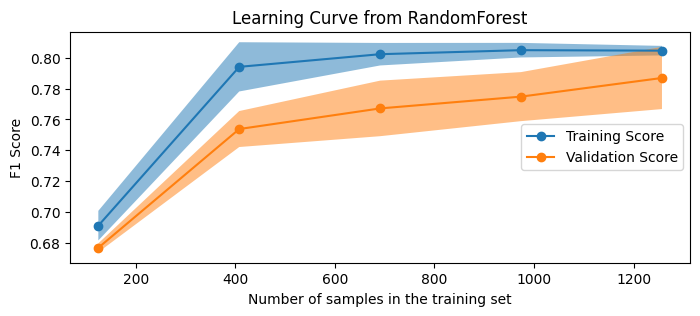

In [ ]:
from sklearn.model_selection import LearningCurveDisplay

# Set figure size
fig, ax = plt.subplots(figsize=(8, 3))

# Set the required parameters
common_params={
    "X": X_train,
    "y": y_train,
    "train_sizes": np.linspace(0.1, 1, 5),
    "cv": 5,
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {'marker': 'o'},
    "score_name": f1_score
}

# Generate learning curve plot
LearningCurveDisplay.from_estimator(final_model, **common_params, ax=ax)

# Set title and legend
handles, label = ax.get_legend_handles_labels()
ax.legend(handles[:2], ['Training Score', 'Validation Score'], loc='center right')
ax.set_title(f'Learning Curve from RandomForest')
ax.set_ylabel('F1 Score')

# Show the plot
plt.show()

Interpretasi :

- Training score menunjukkan bahwa modell semakin baik dengan lebih banyak data train. Kenaikan training score menunjukkan bahwa model lebih mampu menagkap pola dalam data training saat dataset bertambah besar. Setelah mencapai ukuran pelatihan lebih dari kira-kira 900, penambahan ukuran training score tidak meningkat secara signifikan, yang dapat menandakan bahwa model mungkin sudah mempelajari sebagian besar informasi yang tersedia dari data train.

- Peningkatan konsistensi dalam score validasi menunjukkan bahwa model juga semakin baik dalam generalisasi pada data yang tidak terlihat selama training. Dari visualisasi tidak ada indikasi overfitting yang jelas karena score validasi terus meningkat seiring bertambahnya train set. Hal ini dapat menjadi tanda bahwa model dapat terus meningkatkan kemampuannya dalamm memprediksi data yang belum ada sebelumnya.

- Model menunjukkan peforma yang baik dalam hal generalisasi pada data validasi. Ukuran training yang lebih besar menunjukkan bahwa model masih mendapatkan peningkatan peforma dari bertambahnya data. 

## **Feature Importances**

In [ ]:
print("Transformers dalam ColumnTransformer:")
for name, transformer, columns in column_transformer.transformers:
    print(f"Name: {name}, Transformer: {transformer}, Columns: {columns}")

Transformers dalam ColumnTransformer:
Name: ordinal, Transformer: OrdinalEncoder(), Columns: ['cat_age']
Name: one hot, Transformer: OneHotEncoder(drop='first'), Columns: ['cat_job', 'housing', 'loan', 'contact', 'poutcome']
Name: binary, Transformer: BinaryEncoder(), Columns: ['month']


In [ ]:
# Model
final_model[-1]

RandomForestClassifier(max_depth=6, max_features=4, min_samples_leaf=6,
                       min_samples_split=45, n_estimators=300, random_state=0)

In [ ]:
pipeline.fit(X_train, y_train)

# Transform the training data
X_train_transformed = pipeline.named_steps['transformer'].transform(X_train)

# Print the shape of transformed data
print("Shape of transformed data:", X_train_transformed.shape)

# Extract feature names from ColumnTransformer
column_transformer = pipeline.named_steps['transformer']

# Ordinal features
ordinal_features = ['cat_age']

# OneHotEncoder
onehot_encoder = column_transformer.named_transformers_['one hot']
onehot_features = onehot_encoder.get_feature_names_out()

# BinaryEncoder
binary_encoder = column_transformer.named_transformers_['binary']
binary_features = binary_encoder.get_feature_names_out()

# Passthrough features
passthrough_features = ['balance', 'campaign', 'pdays']

# Combine all feature names
all_feature_names = ordinal_features + list(onehot_features) + list(binary_features) + passthrough_features

print("Extracted feature names:", all_feature_names)

Shape of transformed data: (1572, 16)
Extracted feature names: ['cat_age', 'cat_job_job2', 'cat_job_job3', 'housing_yes', 'loan_yes', 'contact_telephone', 'contact_unknown', 'poutcome_other', 'poutcome_success', 'month_0', 'month_1', 'month_2', 'month_3', 'balance', 'campaign', 'pdays']


In [ ]:
# Get the fitted RandomForest model
rf_model_fitted = pipeline.named_steps['model']

# Print number of feature importances
print(f"Number of feature importances: {len(rf_model_fitted.feature_importances_)}")

# Ensure length match
if len(all_feature_names) != len(rf_model_fitted.feature_importances_):
    print("Mismatch in number of features and feature importances.")
    print("Feature names:", all_feature_names)
    print("Feature importances:", rf_model_fitted.feature_importances_)
else:
    # Create a DataFrame for feature importance
    feature_importance_df = pd.DataFrame({
        'Feature': all_feature_names,
        'Importance': rf_model_fitted.feature_importances_
    }).sort_values(by='Importance', ascending=False)

    # Print feature importance
    print(feature_importance_df)

Number of feature importances: 16
              Feature  Importance
8    poutcome_success    0.328545
3         housing_yes    0.214741
15              pdays    0.174843
13            balance    0.092593
4            loan_yes    0.043713
14           campaign    0.034314
9             month_0    0.022852
0             cat_age    0.022827
11            month_2    0.015732
1        cat_job_job2    0.015132
12            month_3    0.013012
7      poutcome_other    0.008587
10            month_1    0.007746
2        cat_job_job3    0.002773
5   contact_telephone    0.002506
6     contact_unknown    0.000086


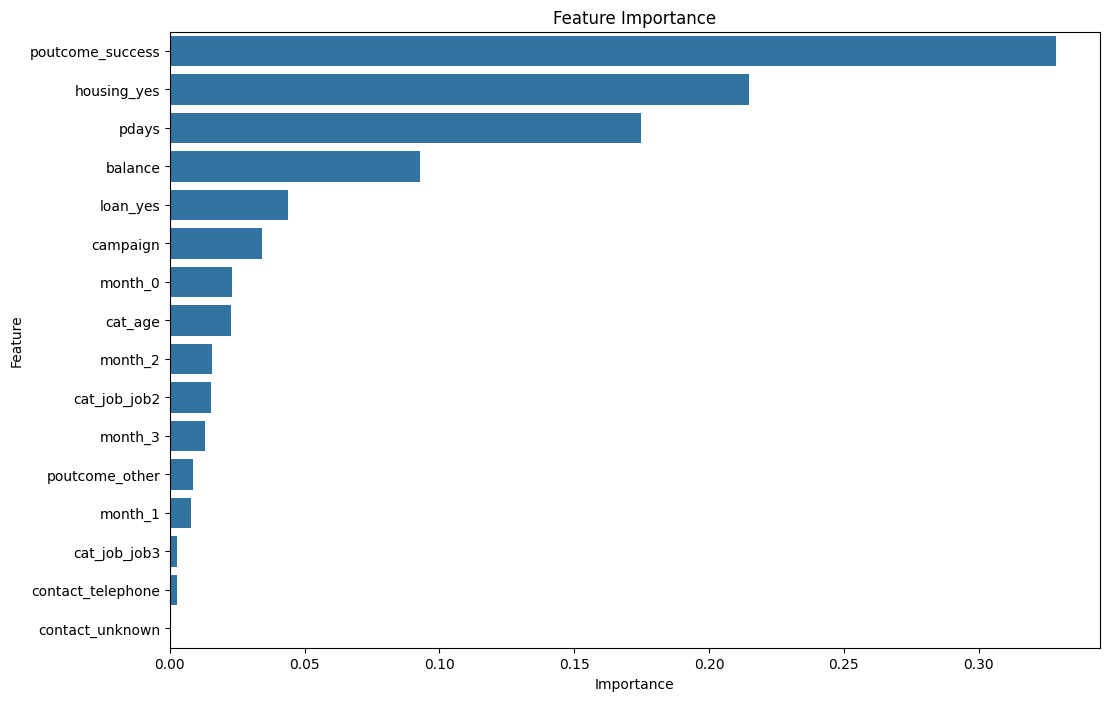

In [ ]:
# Ensure length match
if len(all_feature_names) != len(rf_model_fitted.feature_importances_):
    print("Mismatch in number of features and feature importances.")
    print("Feature names:", all_feature_names)
    print("Feature importances:", rf_model_fitted.feature_importances_)
else:
    # Create a DataFrame for feature importance
    feature_importance_df = pd.DataFrame({
        'Feature': all_feature_names,
        'Importance': rf_model_fitted.feature_importances_
    }).sort_values(by='Importance', ascending=False)

    # Plot feature importance
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
    plt.title('Feature Importance')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()

Interpretasi :

- `poutcome_success` : menunjukkan bahwa hasil campaign sebelumnya (success) sangat mempengaruhi keputusan untuk melakukan deposito. Jika nasabah sudah menunjukkan hasil sukses pada kampanye sebelumnya, nasabah lebih cenderung melakukan deposito. 

- `housing_yes` : menunjukkan bahwa kepemilikan rumah juga merupakan feature penting. Nasabah yang memiliki rumah lebih ccenderung untuk melakukan investasi deposito, mungkin karena nasabah memang meiliki stabilitas finansial yang lebih baik.

- `pdays` : jumlah hari sejak nasabah terakhir dihubungi mempengaruhi keputusan deposito. Hal ini mungkin menunjukkan keterhubungan antara waktu kontak terakhir dan minat nasabah terhadap deposito.

- `balance` : saldo rekening nasabah memiliki pengaruh yang cukup signifikan, tetapi tidak sebesar feature utama lainnya. Nasabah dengan saldo lebih tinggi mungkin lebih cenderung untuk berinvestasi dalam deposito.

- `loan_yes` : memiliki pinjaman mempengaruhi keputusan deposito, namun dengan pengaruh yang relatif kecil dibandung feature utama lainnya. Nasabah dengan pinjaman mungkin memiliki lebih sedikit dana yang tersedia untuk deposito.

## **Classification Report**

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.65      0.66       127
           1       0.84      0.85      0.84       266

    accuracy                           0.78       393
   macro avg       0.75      0.75      0.75       393
weighted avg       0.78      0.78      0.78       393



Interpretasi :

- Model menunjukkan peforma yang baik dalam mendetekdi kelas positif dengan precision, recall, dan f1 score yang tinggi, tapi kurang efektif dalam mendeteksi kelas negatif dengan nilai-nilai yang lebih rendah.

- Untuk meningkatkan peforma pada kelas 0, kita mungkin dapat mengevaluasi dengan teknik imbalance secara lebih dalam lagi.


## **PR-Curve**

Best Threshold=0.38004239440673826


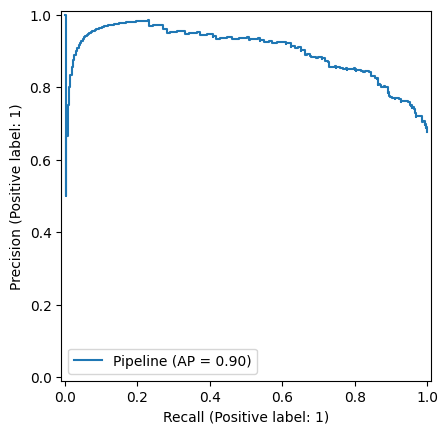

In [ ]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

precision, recall, thresholds = precision_recall_curve(y_test, final_model.predict_proba(X_test)[:,1])
fscore = (2 * precision * recall) / (precision + recall)
ix = np.argmax(fscore)
print(f'Best Threshold={thresholds[ix]}')

PrecisionRecallDisplay.from_estimator(final_model, X_test, y_test)
plt.show()

Interpretasi:

- Nilai Threshold=0.38004239440673826 merupakan batas dimana model dapat mencapai keseimbangan optimal antara precision dan recall. Hal ini berarti bahwa jika kita menetapkan threshold untuk memutuskan kelas positif pada nilai ini, model akan memberikan kombinasi terbaik dari precision dan recall.

- Dengan nilai threshold ini, kinerja model dapat dioptiomalkan berdasarkan tujuan yang spesifik. Jadi, jika kita ingin memaksimalkan f1-score, threshold ini merupakan titik yang ideal.

## **Predict Probability vs Actual**

In [ ]:
y_proba = final_model.predict_proba(X_test)[:,1]

In [ ]:
df_proba = pd.DataFrame(y_test)
df_proba['probability'] = y_proba

In [ ]:
def probability_range(x):
    if x < 0.1:
        probability_range = '0.0 - 0.1'
    elif 0.1 <= x < 0.2:
        probability_range = '0.1 - 0.2'
    elif 0.2 <= x < 0.3:
        probability_range = '0.2 - 0.3'
    elif 0.3 <= x < 0.4:
        probability_range = '0.3 - 0.4'
    elif 0.4 <= x < 0.5:
        probability_range = '0.4 - 0.5'
    elif 0.5 <= x < 0.6:
        probability_range = '0.5 - 0.6'
    elif 0.6 <= x < 0.7:
        probability_range = '0.6 - 0.7'
    elif 0.7 <= x < 0.8:
        probability_range = '0.7 - 0.8'
    elif 0.8 <= x < 0.9:
        probability_range = '0.8 - 0.9'
    else:
        probability_range = '0.9 - 1.0'
        
    return probability_range

df_proba.insert(1, 'probability range',value ='')

df_proba['probability range'] = df_proba['probability'].apply(probability_range)

In [ ]:
df_probability = df_proba.groupby(['probability range', 'deposit']).size().unstack().reset_index()
df_probability['total'] = df_probability[1]+df_probability[0]
df_probability['actual probability'] = (df_probability[1]/df_probability['total']).round(2)
df_probability['predicted probability'] = df_proba.groupby(['probability range'])['probability'].mean().values.round(2)
df_probability = df_probability.sort_values(by='probability range', ascending=False)
df_probability = df_probability.rename(columns = {0:'no', 1:'yes'})
df_probability

deposit,probability range,no,yes,total,actual probability,predicted probability
8,0.9 - 1.0,3.0,72.0,75.0,0.96,0.92
7,0.8 - 0.9,6.0,56.0,62.0,0.90,0.86
6,0.7 - 0.8,14.0,53.0,67.0,0.79,0.75
5,0.6 - 0.7,11.0,21.0,32.0,0.66,0.65
4,0.5 - 0.6,10.0,23.0,33.0,0.70,0.55
3,0.4 - 0.5,32.0,22.0,54.0,0.41,0.45
2,0.3 - 0.4,43.0,18.0,61.0,0.30,0.36
1,0.2 - 0.3,6.0,1.0,7.0,0.14,0.26
0,0.1 - 0.2,2.0,NaN,NaN,NaN,0.19


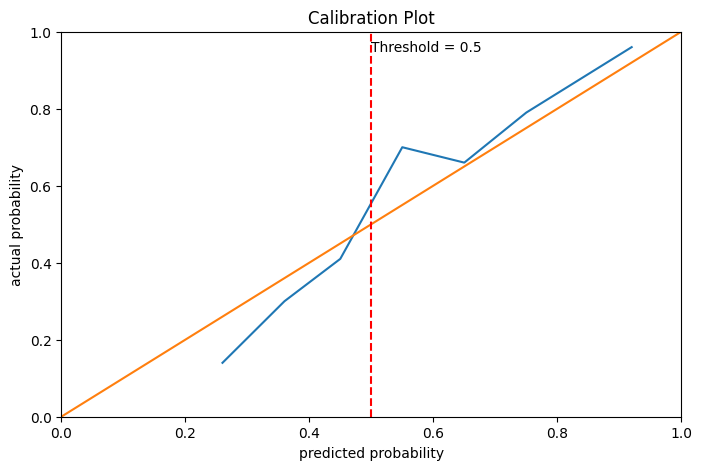

In [ ]:
plt.figure(figsize=(8,5))
sns.lineplot(data=df_probability.sort_values(by='probability range', ascending=True), x='predicted probability', y='actual probability')
value = [x/100 for x in range(0,110,10)]
sns.lineplot(x=value, y=value)
plt.xlim(0,1)
plt.ylim(0,1)
plt.axvline(0.5, color='r', linestyle='--')
plt.annotate('Threshold = 0.5', (0.5,0.95))
plt.title('Calibration Plot')
plt.show()

Interpretasi: 

- Model sangat efektif falam mendeteksi kasus positif pada rentang probabilitas yang lelbih tinggi. Ketepatan dan akurasi sangat baik pada rentang ini.

- Akurasi dan ketepatan prediksi menurun dengan penurunan probabilitas. Model kurang efektif dalam memprediksi hasil untuk rentang probabilitas yang lebih rendah.

- Mengumpulkan lebih banyak data pada rentang probabilitas rendah dapat membantu memprebaiki akurasi dan ketepatan model pada area tersebut.

## **Confusion Matrix**

<Axes: >

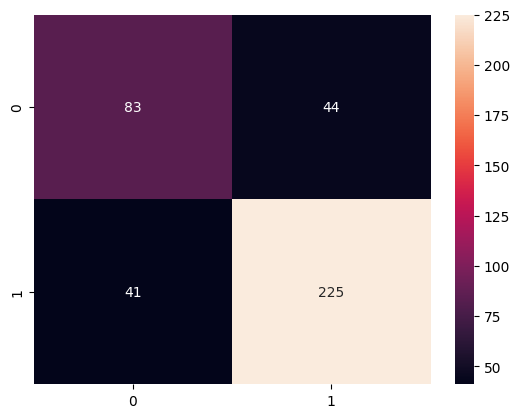

In [ ]:
confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')

## **Cost Benefit Analysis**

- Menghitung kerugian FP 

    - Jumlah FP = 44

    - Biaya telemarketing per nasabah = Rp 35.349,9/nasabah

    - Total biaya FP= Jumlah FP x biaya telemarketing per nasabah = 44 x Rp 35.349,9 ≈ Rp 1.553.596,6

- Menghitung kerugian dari FN

    - Jumlah FN = 41

    - Keuntungan per nasabah = Rp 69.333/nasabah

    - Total kerugian FN = Jumlah FN x keuntungan per nasabah = 41 x  Rp 69.333 ≈ Rp 2.844.633

- Menghitung keuntungan dari TP

    - Jumlah TP = 225

    - Keuntungan per nasabah = Rp 69.333/nasabah
    
    - Total keuntungan TP = Jumlah TP x keuntungan per nasabah = 225 x  Rp 69.333 ≈ Rp 15.622.425

- Ringkasan biaya-manfaat

    - Total biaya FP ≈ Rp 1.553.596,6

    - Total kerugian FN ≈ Rp 2.844.633

    - Total keuntungan TP ≈ Rp 15.622.425

- Net Benefit 

    - Net Benefit = Total keuntungan TP - (Total biaya FP-Total kerugian FN ) ≈ Rp 11.224.195,4

- Kesimpulan

    - Net Benefit dari model ini adalah sekitar Rp 11.224.195,4. Hal ini menunjukkan bahwa meskipun biaya yang terkait dengan false positives dan kerugian dari false negatives, keuntungan dari true postive lebih besar dari total biaya tersebut, yang dapat menghasilkan manfaat bersih positif.

# ANALISA SELANJUTNYA DAPAT DILIHAT PADA FILE **main.ipynb**